In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# 读取数据
train_bank = pd.read_csv('G:/kaggle竞赛GM之路！！！/竞赛ing/2021CCF个贷违约预测/train_public.csv')
test_bank = pd.read_csv('G:/kaggle竞赛GM之路！！！/竞赛ing/2021CCF个贷违约预测/test_public.csv')
train_internet = pd.read_csv('G:/kaggle竞赛GM之路！！！/竞赛ing/2021CCF个贷违约预测/train_internet.csv')

In [3]:
train_bank.shape

(10000, 39)

In [4]:
test_bank.shape

(5000, 38)

In [5]:
train_internet.shape

(750000, 42)

In [6]:
train_bank.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   622
house_exist                   0
censor_status                 0
issue_date                    0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              7
recircle_b                    0
recircle_u                    0
initial_list_status           0
app_type                      0
earlies_credit_mon            0
title                         0
policy_code                   0
f0                          498
f1      

In [7]:
test_bank.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   278
house_exist                   0
censor_status                 0
issue_date                    0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              4
recircle_b                    0
recircle_u                    0
initial_list_status           0
app_type                      0
earlies_credit_mon            0
title                         0
policy_code                   0
f0                          259
f1      

In [8]:
train_internet.isnull().sum()

loan_id                         0
user_id                         0
total_loan                      0
year_of_loan                    0
interest                        0
monthly_payment                 0
class                           0
sub_class                       0
work_type                       0
employer_type                   0
industry                        0
work_year                   43847
house_exist                     0
house_loan_status               0
censor_status                   0
marriage                        0
offsprings                      0
issue_date                      0
use                             0
post_code                       1
region                          0
debt_loan_ratio               230
del_in_18month                  0
scoring_low                     0
scoring_high                    0
pub_dero_bankrup              375
early_return                    0
early_return_amount             0
early_return_amount_3mon        0
recircle_b    

In [157]:
#train_bank, test_bank, train_internet的work_year, pub_dero_bankrup, f0-f4有5%-10%以内的缺失
#train_internet的post_code, title, debt_loan_ratio, pub_dero_bankrup, recircle_u有0.1%以内的缺失

In [10]:
#总体违约率
train_bank[train_bank['isDefault']==1].isDefault.count()/train_bank.shape[0]

0.1683

In [11]:
train_internet[train_internet['is_default']==1].is_default.count()/train_internet.shape[0]

0.199564

In [3]:
#共同特征
common_cols = []
for col in train_bank.columns:
    if col in train_internet.columns:
        common_cols.append(col)
    else: continue
len(common_cols)

35

In [14]:
train_bank_left = list(set(list(train_bank.columns)) - set(common_cols))
print(train_bank_left)

['isDefault', 'known_outstanding_loan', 'app_type', 'known_dero']


In [15]:
train_internet_left = list(set(list(train_internet.columns)) - set(common_cols))
print(train_internet_left)

['f5', 'work_type', 'sub_class', 'offsprings', 'house_loan_status', 'is_default', 'marriage']


In [16]:
train_bank.describe()

loan_id        user_id    total_loan  year_of_loan      interest  \
count  1.000000e+04   10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.025210e+06  225209.587700  14402.126591      3.479600     13.222782   
std    1.438682e+04   14386.820956   8953.946807      0.853965      4.875755   
min    1.000008e+06  200008.000000    818.181818      3.000000      4.779000   
25%    1.012973e+06  212973.250000   7500.000000      3.000000      9.702000   
50%    1.025276e+06  225276.500000  12272.727270      3.000000     12.639000   
75%    1.037694e+06  237694.500000  19636.363640      3.000000     15.985500   
max    1.049997e+06  249997.000000  47272.727270      5.000000     33.979000   

       monthly_payment   house_exist  censor_status           use  \
count     10000.000000  10000.000000   10000.000000  10000.000000   
mean        436.960427      0.612200       1.014600      1.762600   
std         261.754396      0.672203       0.787686      2.392031   
min          30.440000      0.000000       0.000000      0.000000   
25%         248.820000      0.000000       0.000000      0.000000   
50%         371.525000      1.000000       1.000000      0.000000   
75%         573.830000      1.000000       2.000000      4.000000   
max        1503.890000      4.000000       2.000000     13.000000   

          post_code        region  debt_loan_ratio  del_in_18month  \
count  10000.000000  10000.000000     10000.000000    10000.000000   
mean     257.519100     16.319900        17.532170        0.311600   
std      201.351778     11.019097        14.218509        0.872457   
min        0.000000      0.000000         0.000000        0.000000   
25%       99.000000      8.000000        11.157955        0.000000   
50%      197.000000     14.000000        16.652273        0.000000   
75%      390.000000     22.000000        22.781591        0.000000   
max      901.000000     49.000000       999.000000       15.000000   

        scoring_low  scoring_high  known_outstanding_loan    known_dero  \
count  10000.000000  10000.000000            10000.000000  10000.000000   
mean     664.115591    774.448326               11.645000      0.226400   
std       77.040511     99.174427                5.500745      0.607931   
min      540.000000    585.000000                1.000000      0.000000   
25%      601.363636    700.000000                8.000000      0.000000   
50%      665.000000    772.727273               11.000000      0.000000   
75%      725.454545    845.000000               14.000000      0.000000   
max      910.909091   1131.818182               59.000000     12.000000   

       pub_dero_bankrup     recircle_b    recircle_u  initial_list_status  \
count       9993.000000   10000.000000  10000.000000         10000.000000   
mean           0.138997   16548.299423     53.622625             0.414100   
std            0.379089   21078.544232     26.023562             0.492591   
min            0.000000       0.000000      0.000000             0.000000   
25%            0.000000    6189.173077     33.969231             0.000000   
50%            0.000000   11476.076925     53.280769             0.000000   
75%            0.000000   20384.076923     73.309615             1.000000   
max            5.000000  779021.000000    120.615385             1.000000   

           app_type        title  policy_code           f0           f1  \
count  10000.000000  10000.00000      10000.0  9502.000000  9142.000000   
mean       0.020000   1808.20160          1.0     5.690486     0.001422   
std        0.140007   8011.09827          0.0     3.298546     0.037685   
min        0.000000      0.00000          1.0     0.000000     0.000000   
25%        0.000000      0.00000          1.0     3.000000     0.000000   
50%        0.000000      1.00000          1.0     5.000000     0.000000   
75%        0.000000      5.00000          1.0     7.000000     0.000000   
max        1.000000  61387.00000          1.0    33.000000     1.000

In [17]:
train_internet.describe()

loan_id        user_id     total_loan   year_of_loan  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   400033.712168  374999.500000   14419.406533       3.482909   
std    230968.542263  216506.495284    8717.343741       0.855931   
min         0.000000       0.000000     500.000000       3.000000   
25%    199923.750000  187499.750000    8000.000000       3.000000   
50%    400077.500000  374999.500000   12000.000000       3.000000   
75%    600051.250000  562499.250000   20000.000000       3.000000   
max    799999.000000  749999.000000   40000.000000       5.000000   

            interest  monthly_payment    house_exist  house_loan_status  \
count  750000.000000    750000.000000  750000.000000      750000.000000   
mean       13.240062       438.032920       0.614275           0.594845   
std         4.767528       261.513407       0.675669           0.675966   
min         5.310000        15.690000       0.000000           0.000000   
25%         9.750000       248.450000       0.000000           0.000000   
50%        12.740000       375.160000       1.000000           0.000000   
75%        15.990000       580.730000       1.000000           1.000000   
max        30.990000      1715.420000       5.000000           2.000000   

       censor_status       marriage     offsprings            use  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean        1.009744       0.545964       1.082875       1.745847   
std         0.782731       0.609480       1.691962       2.367289   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         2.000000       1.000000       2.000000       4.000000   
max         2.000000       3.000000       5.000000      13.000000   

           post_code         region  debt_loan_ratio  del_in_18month  \
count  749999.000000  750000.000000    749770.000000   750000.000000   
mean      258.558866      16.388876        18.279789        0.318439   
std       200.048948      11.035696        11.131223        0.881002   
min         0.000000       0.000000        -1.000000        0.000000   
25%       103.000000       8.000000        11.790000        0.000000   
50%       203.000000      14.000000        17.610000        0.000000   
75%       395.000000      22.000000        24.050000        0.000000   
max       940.000000      50.000000       999.000000       39.000000   

         scoring_low   scoring_high  pub_dero_bankrup   early_return  \
count  750000.000000  750000.000000     749625.000000  750000.000000   
mean      696.203687     700.203836          0.133995       1.197812   
std        31.872355      31.873054          0.377491       4.703108   
min       630.000000     634.000000          0.000000       0.000000   
25%       670.000000     674.000000          0.000000       0.000000   
50%       690.000000     694.000000          0.000000       0.000000   
75%       710.000000     714.000000          0.000000       0.000000   
max       845.000000     850.000000         12.000000      29.000000   

       early_return_amount  early_return_amount_3mon    recircle_b  \
count        750000.000000             750000.000000  7.500000e+05   
mean             95.276161                 38.049143  1.624001e+04   
std             422.263735                175.650653  2.257880e+04   
min               0.000000                  0.000000  0.000000e+00   
25%               0.000000                  0.000000  5.944000e+03   
50%               0.000000                  0.000000  1.113500e+04   
75%               0.000000                  0.000000  1.973400e+04   
max            4321.000000               2539.717451  2.904836e+06   

          recircle_u  initial_list_status          title  policy_code  \
count  749511.000000        750000.000000  749999.000000     750000.0   
mean       51.7877

In [18]:
test_bank.describe()

loan_id        user_id    total_loan  year_of_loan     interest  \
count  5.000000e+03    5000.000000   5000.000000   5000.000000  5000.000000   
mean   1.024992e+06  224991.897800  14257.687727      3.492400    13.207284   
std    1.443135e+04   14431.348968   8755.784815      0.861679     4.795365   
min    1.000006e+06  200006.000000    818.181818      3.000000     4.788000   
25%    1.012724e+06  212723.500000   7636.363636      3.000000     9.675000   
50%    1.024658e+06  224658.500000  12272.727270      3.000000    12.690000   
75%    1.037519e+06  237518.750000  19200.000000      3.000000    15.990000   
max    1.049998e+06  249998.000000  47272.727270      5.000000    34.089000   

       monthly_payment  house_exist  censor_status          use    post_code  \
count      5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean        430.961668     0.616400       0.998000     1.803200   262.266000   
std         251.272924     0.671819       0.781613     2.413801   201.484039   
min          30.530000     0.000000       0.000000     0.000000     0.000000   
25%         250.290000     0.000000       0.000000     0.000000   103.000000   
50%         375.430000     1.000000       1.000000     0.000000   214.000000   
75%         564.562500     1.000000       2.000000     4.000000   401.000000   
max        1486.340000     5.000000       2.000000    13.000000   936.000000   

            region  debt_loan_ratio  del_in_18month  scoring_low  \
count  5000.000000      5000.000000     5000.000000  5000.000000   
mean     16.310000        17.479392        0.302800   663.751545   
std      11.185013        10.097454        0.852559    76.529284   
min       0.000000         0.000000        0.000000   540.000000   
25%       8.000000        10.962727        0.000000   604.545455   
50%      14.000000        16.670909        0.000000   665.000000   
75%      22.000000        23.050000        0.000000   725.454545   
max      49.000000       380.720000       16.000000   900.000000   

       scoring_high  known_outstanding_loan   known_dero  pub_dero_bankrup  \
count   5000.000000              5000.00000  5000.000000       4996.000000   
mean     774.180545                11.57440     0.213200          0.142914   
std      100.014385                 5.49488     0.538706          0.392614   
min      585.000000                 1.00000     0.000000          0.000000   
25%      699.242424                 8.00000     0.000000          0.000000   
50%      772.727273                11.00000     0.000000          0.000000   
75%      843.750000                14.00000     0.000000          0.000000   
max     1125.000000                42.00000     8.000000          4.000000   

          recircle_b   recircle_u  initial_list_status    app_type  \
count    5000.000000  5000.000000            5000.0000  5000.00000   
mean    16834.606677    54.142169               0.4074     0.01660   
std     21757.810210    26.039213               0.4914     0.12778   
min         0.000000     0.000000               0.0000     0.00000   
25%      6019.673077    34.517308               0.0000     0.00000   
50%     11526.807690    54.526923               0.0000     0.00000   
75%     20816.519232    73.846154               1.0000     0.00000   
max    473476.153800   152.423077               1.0000     1.00000   

              title  policy_code           f0           f1           f2  \
count   5000.000000       5000.0  4741.000000  4546.000000  4741.000000   
mean    1822.506600          1.0     5.650918     0.000880     8.589538   
std     7971.472766          0.0     3.338728     0.029653     7.425200   
min        0.000000          1.0     0.000000     0.000000     0.000000   
25%        0.000000          1.0     3.000000     0.000000     3.000000   
50%        2.000000          1.0     5.000000     0.000000     7.000000   
75%        5.000000          1.0     7.000000     0.000000    11.000000   
max    61330.000000          1.0

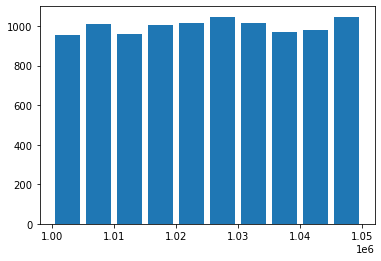

In [19]:
plt.hist(train_bank['loan_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

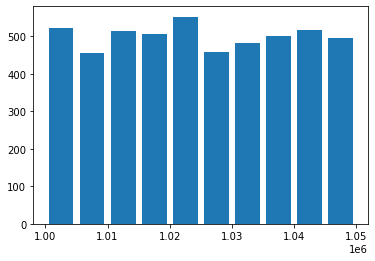

In [22]:
plt.hist(test_bank['loan_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

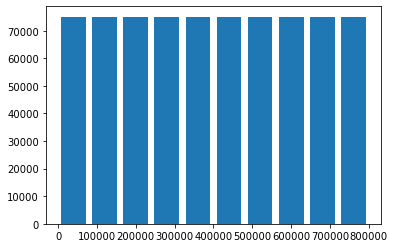

In [23]:
plt.hist(train_internet['loan_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

In [4]:
data_b = train_bank.copy()
data_e = test_bank.copy()
data_t = train_internet.copy()

In [31]:
loan_id_labels = [i for i in range(20)]

data_b['loan_id_bin'] = pd.qcut(data_b['loan_id'], 20, labels=loan_id_labels)

In [32]:
data_b.groupby(['loan_id_bin']).agg({'isDefault':'mean'}).rename(columns={'isDefault':'mean'}).reset_index()

loan_id_bin   mean
0            0  0.170
1            1  0.180
2            2  0.186
3            3  0.136
4            4  0.172
5            5  0.170
6            6  0.176
7            7  0.196
8            8  0.140
9            9  0.146
10          10  0.174
11          11  0.162
12          12  0.172
13          13  0.176
14          14  0.176
15          15  0.158
16          16  0.162
17          17  0.174
18          18  0.170
19          19  0.170

In [33]:
#可以看出是有差异的，如果使用ID特征，那么在测试集上的预测效果必然更好，但是这样做会引入未来数据。
#如果上线实时风控审核，那么ID数据就会无法分箱。

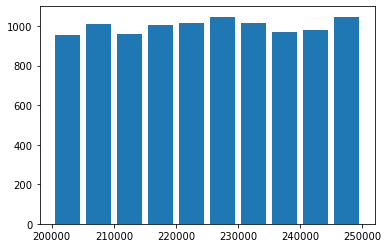

In [34]:
plt.hist(train_bank['user_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

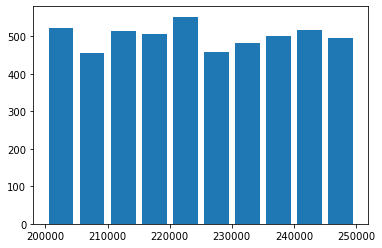

In [36]:
plt.hist(test_bank['user_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

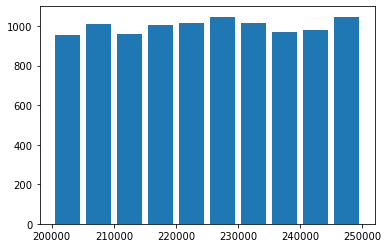

In [37]:
plt.hist(train_bank['user_id'], 10, histtype='bar', rwidth=0.8)
plt.show()

In [40]:
user_id_labels = [i for i in range(20)]
data_b['user_id_bin'] = pd.qcut(data_b['user_id'], 20, labels=user_id_labels)
data_b.groupby(['user_id_bin']).agg({'isDefault':'mean'}).rename(columns={'isDefault':'mean'}).reset_index()

user_id_bin   mean
0            0  0.170
1            1  0.180
2            2  0.186
3            3  0.136
4            4  0.172
5            5  0.170
6            6  0.176
7            7  0.196
8            8  0.140
9            9  0.146
10          10  0.174
11          11  0.162
12          12  0.172
13          13  0.176
14          14  0.176
15          15  0.158
16          16  0.162
17          17  0.174
18          18  0.170
19          19  0.170

In [41]:
#user_id分箱后，分组平均违约率也是有明显差异的
#ID分组的差异也可能和时间段有关

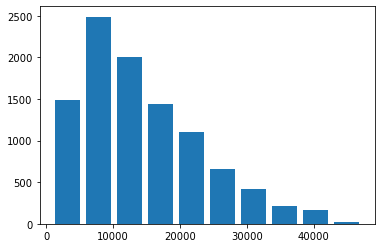

In [60]:
plt.hist(train_bank['total_loan'], 10, histtype='bar', rwidth=0.8)
plt.show()

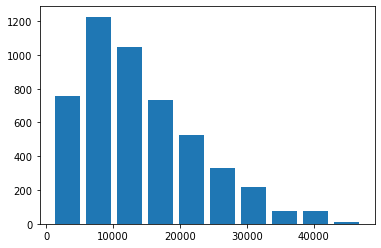

In [61]:
plt.hist(test_bank['total_loan'], 10, histtype='bar', rwidth=0.8)
plt.show()

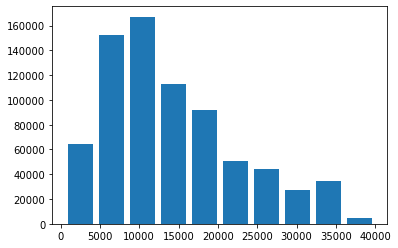

In [63]:
plt.hist(train_internet['total_loan'], 10, histtype='bar', rwidth=0.8)
plt.show()

In [58]:
total_loan_labels = [i for i in range(5)]
total_loan_bin = [0, 5000, 10000, 20000, 30000, data_b['total_loan'].max()]
data_b['total_loan_bin'] = pd.cut(data_b['total_loan'], total_loan_bin, labels=total_loan_labels).astype(int)
data_b.groupby(['total_loan_bin']).agg({'isDefault':'mean','total_loan_bin':'count'}).rename(columns={'isDefault':'mean','total_loan_bin':'count'}).reset_index()

total_loan_bin      mean  count
0               0  0.146965   1252
1               1  0.165436   2708
2               2  0.174194   3720
3               3  0.171846   1641
4               4  0.178203    679

In [59]:
data_t['total_loan_bin'] = pd.cut(data_t['total_loan'], total_loan_bin, labels=total_loan_labels).astype(int)
data_t.groupby(['total_loan_bin']).agg({'is_default':'mean','total_loan_bin':'count'}).rename(columns={'is_default':'mean','total_loan_bin':'count'}).reset_index()

total_loan_bin      mean   count
0               0  0.157170  101559
1               1  0.172196  208117
2               2  0.215838  277722
3               3  0.228824  117256
4               4  0.244785   45346

In [64]:
#分组违约率单调性基本一致

In [65]:
data_b.groupby(['year_of_loan']).agg({'isDefault':'mean','year_of_loan':'count'}).rename(columns={'isDefault':'mean','year_of_loan':'count'}).reset_index()

year_of_loan      mean  count
0             3  0.141542   7602
1             5  0.253128   2398

In [66]:
data_t.groupby(['year_of_loan']).agg({'is_default':'mean','year_of_loan':'count'}).rename(columns={'is_default':'mean','year_of_loan':'count'}).reset_index()

year_of_loan      mean   count
0             3  0.160131  568909
1             5  0.323445  181091

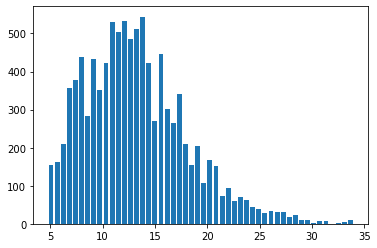

In [68]:
plt.hist(train_bank['interest'], 50, histtype='bar', rwidth=0.8)
plt.show()

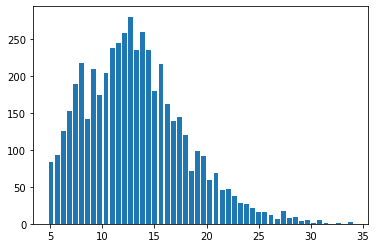

In [69]:
plt.hist(test_bank['interest'], 50, histtype='bar', rwidth=0.8)
plt.show()

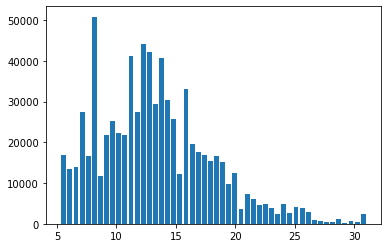

In [70]:
plt.hist(train_internet['interest'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [5]:
interest_labels = [i for i in range(8)]
interest_bin = [0, 7.5, 10, 12.5, 15, 17.5, 20, 25, data_b['interest'].max()]
data_b['interest_bin'] = pd.cut(data_b['interest'], interest_bin, labels=interest_labels).astype(int)
data_b.groupby(['interest_bin']).agg({'isDefault':'mean','interest_bin':'count'}).rename(columns={'isDefault':'mean','interest_bin':'count'}).reset_index()

interest_bin      mean  count
0             0  0.054758   1114
1             1  0.089744   1638
2             2  0.147332   2043
3             3  0.182037   2082
4             4  0.204665   1329
5             5  0.275618    849
6             6  0.300971    721
7             7  0.321429    224

In [79]:
data_t['interest_bin'] = pd.cut(data_t['interest'], interest_bin, labels=interest_labels).astype(int)
data_t.groupby(['interest_bin']).agg({'is_default':'mean','interest_bin':'count'}).rename(columns={'is_default':'mean','interest_bin':'count'}).reset_index()

interest_bin      mean   count
0             0  0.049703   80035
1             1  0.100595  129271
2             2  0.151223  145791
3             3  0.216481  163026
4             4  0.268289   94566
5             5  0.329666   77451
6             6  0.386713   45186
7             7  0.475262   14674

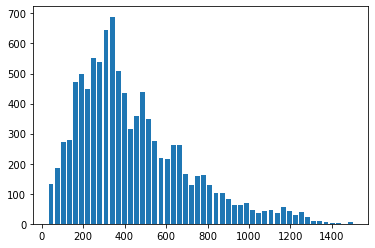

In [80]:
plt.hist(train_bank['monthly_payment'], 50, histtype='bar', rwidth=0.8)
plt.show()

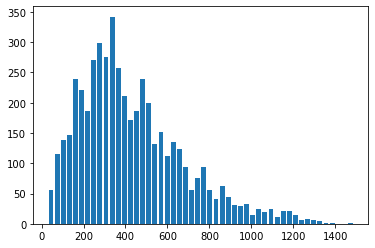

In [81]:
plt.hist(test_bank['monthly_payment'], 50, histtype='bar', rwidth=0.8)
plt.show()

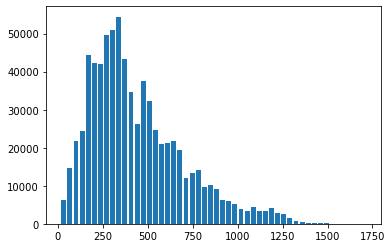

In [82]:
plt.hist(train_internet['monthly_payment'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [95]:
monthly_payment_labels = [i for i in range(9)]
monthly_payment_bin = [0, 150, 250, 350, 450, 600, 800, 1000, 1200, data_b['monthly_payment'].max()]
data_b['monthly_payment_bin'] = pd.cut(data_b['monthly_payment'], monthly_payment_bin, labels=monthly_payment_labels)
data_b.groupby(['monthly_payment_bin']).agg({'isDefault':'mean','monthly_payment_bin':'count'}).rename(columns={'isDefault':'mean','monthly_payment_bin':'count'}).reset_index()

monthly_payment_bin      mean  count
0                   0  0.144647    878
1                   1  0.143990   1639
2                   2  0.183547   2103
3                   3  0.190948   1414
4                   4  0.173488   1637
5                   5  0.164110   1304
6                   6  0.174790    595
7                   7  0.116041    293
8                   8  0.204380    137

In [96]:
data_t['monthly_payment_bin'] = pd.cut(data_t['monthly_payment'], monthly_payment_bin, labels=monthly_payment_labels)
data_t.groupby(['monthly_payment_bin']).agg({'is_default':'mean','monthly_payment_bin':'count'}).rename(columns={'is_default':'mean','monthly_payment_bin':'count'}).reset_index()

monthly_payment_bin      mean   count
0                   0  0.147016   65265
1                   1  0.161825  124369
2                   2  0.201112  154620
3                   3  0.218382  103786
4                   4  0.224007  125786
5                   5  0.205426   98678
6                   6  0.233282   45803
7                   7  0.208551   22196
8                   8  0.254636    9437

In [97]:
data_b.groupby(['class']).agg({'isDefault':'mean','class':'count'}).rename(columns={'isDefault':'mean','class':'count'}).reset_index()

class      mean  count
0     A  0.059482   1698
1     B  0.117369   2965
2     C  0.194474   2859
3     D  0.231962   1483
4     E  0.324675    693
5     F  0.356846    241
6     G  0.377049     61

In [98]:
data_t.groupby(['class']).agg({'is_default':'mean','class':'count'}).rename(columns={'is_default':'mean','class':'count'}).reset_index()

class      mean   count
0     A  0.060389  130885
1     B  0.132806  219124
2     C  0.224813  212817
3     D  0.304684  112021
4     E  0.384209   52245
5     F  0.453950   17861
6     G  0.497721    5047

In [99]:
data_b.groupby(['employer_type']).agg({'isDefault':'mean','employer_type':'count'}).rename(columns={'isDefault':'mean','employer_type':'count'}).reset_index()

employer_type      mean  count
0          上市企业  0.161795    958
1         世界五百强  0.186347    542
2       幼教与中小学校  0.162393   1053
3          政府机构  0.170978   2474
4          普通企业  0.168547   4610
5        高等教育机构  0.154270    363

In [100]:
data_t.groupby(['employer_type']).agg({'is_default':'mean','employer_type':'count'}).rename(columns={'is_default':'mean','employer_type':'count'}).reset_index()

employer_type      mean   count
0          上市企业  0.202113   74968
1         世界五百强  0.109576   40538
2       幼教与中小学校  0.197144   74991
3          政府机构  0.069880  193688
4          普通企业  0.295205  340530
5        高等教育机构  0.048804   25285

In [98]:
#train_bank和train_internet的employer_type的分组违约率差别很大

In [104]:
ind_b = data_b.groupby(['industry']).agg({'isDefault':'mean','industry':'count'}).rename(columns={'isDefault':'mean','industry':'count'}).reset_index()

In [105]:
ind_t = data_t.groupby(['industry']).agg({'is_default':'mean','industry':'count'}).rename(columns={'is_default':'mean','industry':'count'}).reset_index()

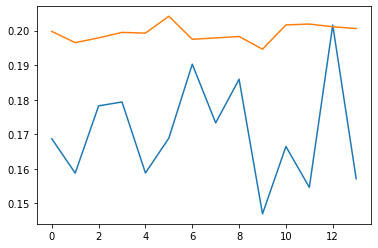

In [111]:
x=range(0,14)
y1=list(ind_b['mean'])
y2=list(ind_t['mean'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [109]:
ind_b['mean'].corr(ind_t['mean'],method='spearman')

-0.006593406593406593

In [112]:
#internet的分组违约率差别很小，且与bank几乎没有相关性

In [36]:
col_a = ['work_year','f0','f1','f2','f3','f4']
for col in col_a:
	data_b[col].fillna(-1,inplace=True)
	data_e[col].fillna(-1,inplace=True)
	data_t[col].fillna(-1,inplace=True)

In [37]:
data_t['post_code'].fillna(134,inplace=True)
data_t['debt_loan_ratio'].fillna(train_internet['debt_loan_ratio'].mean(),inplace=True)
data_t['pub_dero_bankrup'].fillna(0,inplace=True)
data_t['recircle_u'].fillna(train_internet['recircle_u'].mean(),inplace=True)
data_t['title'].fillna(0,inplace=True)

In [7]:
data_b.groupby(['work_year']).agg({'isDefault':'mean','work_year':'count'}).rename(columns={'isDefault':'mean','work_year':'count'}).reset_index()

work_year      mean  count
0          -1  0.249196    622
1      1 year  0.202683    671
2   10+ years  0.153709   3370
3     2 years  0.170991    848
4     3 years  0.179124    776
5     4 years  0.167260    562
6     5 years  0.160514    623
7     6 years  0.151261    476
8     7 years  0.158257    436
9     8 years  0.161572    458
10    9 years  0.180662    393
11   < 1 year  0.143791    765

In [8]:
data_t.groupby(['work_year']).agg({'is_default':'mean','work_year':'count'}).rename(columns={'is_default':'mean','work_year':'count'}).reset_index()

work_year      mean   count
0          -1  0.268958   43847
1      1 year  0.204983   49204
2   10+ years  0.187035  246226
3     2 years  0.199612   67987
4     3 years  0.201637   60128
5     4 years  0.198481   45037
6     5 years  0.196759   47027
7     6 years  0.192552   34910
8     7 years  0.194880   33200
9     8 years  0.197596   33857
10    9 years  0.198280   28379
11   < 1 year  0.205073   60198

In [9]:
#工作年限数据缺失的违约率偏高

In [10]:
wy_b = data_b.groupby(['work_year']).agg({'isDefault':'mean','work_year':'count'}).rename(columns={'isDefault':'mean','work_year':'count'}).reset_index()

In [11]:
wy_t = data_t.groupby(['work_year']).agg({'is_default':'mean','work_year':'count'}).rename(columns={'is_default':'mean','work_year':'count'}).reset_index()

In [12]:
wy_b['mean'].corr(wy_t['mean'],method='spearman')

0.5664335664335665

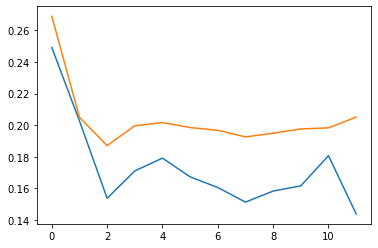

In [13]:
x=range(0,12)
y1=list(wy_b['mean'])
y2=list(wy_t['mean'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [14]:
data_b.groupby(['house_exist']).agg({'isDefault':'mean','house_exist':'count'}).rename(columns={'isDefault':'mean','house_exist':'count'}).reset_index()

house_exist      mean  count
0            0  0.144186   4945
1            1  0.194138   3992
2            2  0.183962   1060
3            3  0.000000      2
4            4  0.000000      1

In [15]:
data_t.groupby(['house_exist']).agg({'is_default':'mean','house_exist':'count'}).rename(columns={'is_default':'mean','house_exist':'count'}).reset_index()

house_exist      mean   count
0            0  0.171678  370915
1            1  0.232123  297928
2            2  0.207466   80876
3            3  0.211429     175
4            4  0.172414      29
5            5  0.233766      77

In [16]:
data_e.groupby(['house_exist'])['house_exist'].count()

house_exist
0    2448
1    2026
2     524
3       1
5       1
Name: house_exist, dtype: int64

In [17]:
data_b.groupby(['censor_status']).agg({'isDefault':'mean','censor_status':'count'}).rename(columns={'isDefault':'mean','censor_status':'count'}).reset_index()

censor_status      mean  count
0              0  0.129373   3030
1              1  0.173959   3794
2              2  0.198678   3176

In [18]:
data_t.groupby(['censor_status']).agg({'is_default':'mean','censor_status':'count'}).rename(columns={'is_default':'mean','censor_status':'count'}).reset_index()

censor_status      mean   count
0              0  0.147272  226132
1              1  0.209584  290428
2              2  0.237753  233440

In [19]:
data_e.groupby(['censor_status'])['censor_status'].count()

censor_status
0    1532
1    1946
2    1522
Name: censor_status, dtype: int64

In [20]:
data_b.groupby(['issue_date']).agg({'isDefault':'mean','issue_date':'count'}).rename(columns={'isDefault':'mean','issue_date':'count'}).reset_index()

issue_date      mean  count
0    2007/10/1  0.000000      1
1    2007/12/1  0.000000      1
2     2008/1/1  0.333333      3
3    2008/11/1  0.666667      3
4    2008/12/1  1.000000      1
..         ...       ...    ...
122   2018/5/1  0.163265     49
123   2018/6/1  0.045455     44
124   2018/7/1  0.000000     31
125   2018/8/1  0.148148     27
126   2018/9/1  0.133333     15

[127 rows x 3 columns]

In [21]:
data_t.groupby(['issue_date']).agg({'is_default':'mean','issue_date':'count'}).rename(columns={'is_default':'mean','issue_date':'count'}).reset_index()

issue_date      mean  count
0    2007-06-01  0.000000      1
1    2007-07-01  0.000000     21
2    2007-08-01  0.150000     20
3    2007-09-01  0.285714      7
4    2007-10-01  0.272727     22
..          ...       ...    ...
134  2018-08-01  0.081959   2001
135  2018-09-01  0.078358   1340
136  2018-10-01  0.043845   1186
137  2018-11-01  0.012346    891
138  2018-12-01  0.011412    701

[139 rows x 3 columns]

In [22]:
data_e.groupby(['issue_date'])['issue_date'].count()

issue_date
2007/10/1     1
2007/8/1      1
2008/1/1      1
2008/10/1     1
2008/3/1      1
             ..
2018/5/1     15
2018/6/1     17
2018/7/1     11
2018/8/1      9
2018/9/1      7
Name: issue_date, Length: 123, dtype: int64

In [61]:
data_t.groupby(['issue_date']).agg({'is_default':'mean','issue_date':'count'}).rename(columns={'is_default':'mean','issue_date':'count'}).reset_index().head(10)

issue_date      mean  count
0 2007-06-01  0.000000      1
1 2007-07-01  0.000000     21
2 2007-08-01  0.150000     20
3 2007-09-01  0.285714      7
4 2007-10-01  0.272727     22
5 2007-11-01  0.130435     23
6 2007-12-01  0.196078     51
7 2008-01-01  0.219512     82
8 2008-02-01  0.151515     99
9 2008-03-01  0.169355    124

In [71]:
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_b['issue_date'] = pd.to_datetime(data_b['issue_date'])
data_t['issue_date'] = pd.to_datetime(data_t['issue_date'])
data_e['issue_date'] = pd.to_datetime(data_e['issue_date'])
data_b['issue_date_diff'] = data_b['issue_date'].apply(lambda x: x-base_time).dt.days
data_t['issue_date_diff'] = data_t['issue_date'].apply(lambda x: x-base_time).dt.days
data_e['issue_date_diff'] = data_e['issue_date'].apply(lambda x: x-base_time).dt.days

In [34]:
d_t = data_t.groupby(['issue_date_diff']).agg({'is_default':'mean','issue_date_diff':'count'}).rename(columns={'is_default':'mean','issue_date_diff':'count'}).reset_index()

In [36]:
d_t

issue_date_diff      mean  count
0                  0  0.000000      1
1                 30  0.000000     21
2                 61  0.150000     20
3                 92  0.285714      7
4                122  0.272727     22
..               ...       ...    ...
134             4079  0.081959   2001
135             4110  0.078358   1340
136             4140  0.043845   1186
137             4171  0.012346    891
138             4201  0.011412    701

[139 rows x 3 columns]

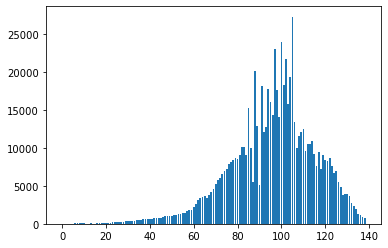

In [38]:
plt.bar(range(len(d_t['count'])),d_t['count'])
plt.show()

In [40]:
data_t['issue_date'][90]

Timestamp('2014-05-01 00:00:00')

In [41]:
data_t['issue_date'][100]

Timestamp('2015-07-01 00:00:00')

In [42]:
#和股市有关？借贷炒股？

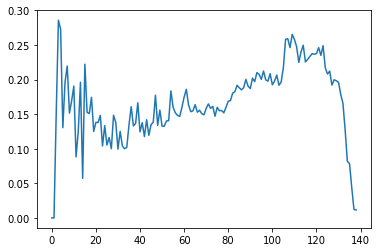

In [50]:
x=range(0,len(d_t['mean']))
plt.plot(x,d_t['mean'])
plt.show()

In [53]:
#前期数据量少，违约率不稳定
#违约率随着贷款数量的上升而上升
#后期贷款数量下降时，违约率也随之下降

In [48]:
d_b = data_b.groupby(['issue_date_diff']).agg({'isDefault':'mean','issue_date_diff':'count'}).rename(columns={'isDefault':'mean','issue_date_diff':'count'}).reset_index()

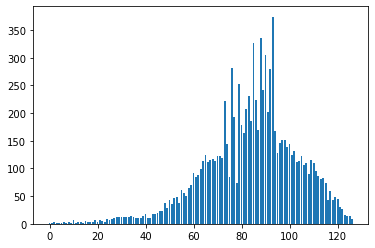

In [49]:
plt.bar(range(len(d_b['count'])),d_b['count'])
plt.show()

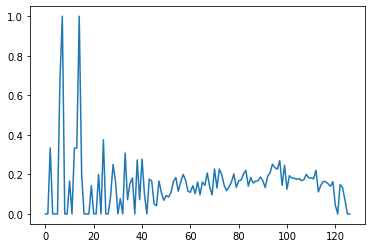

In [51]:
x=range(0,len(d_b['mean']))
plt.plot(x,d_b['mean'])
plt.show()

In [54]:
#分年度和月份看一下

In [57]:
d_b.head(40).sum()

issue_date_diff    37095.00000
mean                   6.39463
count                255.00000
dtype: float64

In [58]:
d_t.head(40).sum()

issue_date_diff    23767.000000
mean                   5.588255
count               8085.000000
dtype: float64

In [64]:
#不能直接用时间差特征，会使用未来数据，当然如果使用的话，在测试集上的预测效果必然更好，但会导致模型上线无法计算特征

In [72]:
data_b['issue_date_y'] = data_b['issue_date'].dt.year
data_b['issue_date_m'] = data_b['issue_date'].dt.month
data_e['issue_date_y'] = data_e['issue_date'].dt.year
data_e['issue_date_m'] = data_e['issue_date'].dt.month
data_t['issue_date_y'] = data_t['issue_date'].dt.year
data_t['issue_date_m'] = data_t['issue_date'].dt.month

In [65]:
data_b.groupby(['issue_date_y']).agg({'isDefault':'mean','issue_date_y':'count'}).rename(columns={'isDefault':'mean','issue_date_y':'count'}).reset_index()

issue_date_y      mean  count
0           2007  0.000000      2
1           2008  0.363636     11
2           2009  0.147059     34
3           2010  0.113402     97
4           2011  0.133333    150
5           2012  0.118421    380
6           2013  0.137352   1012
7           2014  0.164231   1711
8           2015  0.172463   2818
9           2016  0.199252   2138
10          2017  0.175367   1226
11          2018  0.121140    421

In [73]:
data_t.groupby(['issue_date_y']).agg({'is_default':'mean','issue_date_y':'count'}).rename(columns={'is_default':'mean','issue_date_y':'count'}).reset_index()

issue_date_y      mean   count
0           2007  0.165517     145
1           2008  0.164720     856
2           2009  0.123367    2602
3           2010  0.130570    6418
4           2011  0.145314   12153
5           2012  0.160084   29953
6           2013  0.155621   74913
7           2014  0.184553  124609
8           2015  0.202023  209417
9           2016  0.232825  163024
10          2017  0.231507   94537
11          2018  0.158863   31373

In [74]:
data_e.groupby(['issue_date_y'])['issue_date_y'].count()

issue_date_y
2007       2
2008       4
2009      20
2010      51
2011      85
2012     193
2013     501
2014     853
2015    1433
2016    1057
2017     627
2018     174
Name: issue_date_y, dtype: int64

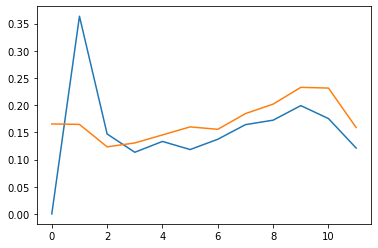

In [75]:
dy_b = data_b.groupby(['issue_date_y']).agg({'isDefault':'mean','issue_date_y':'count'}).rename(columns={'isDefault':'mean','issue_date_y':'count'}).reset_index()
dy_t = data_t.groupby(['issue_date_y']).agg({'is_default':'mean','issue_date_y':'count'}).rename(columns={'is_default':'mean','issue_date_y':'count'}).reset_index()
x=range(0,len(dy_b['count']))
y1=list(dy_b['mean'])
y2=list(dy_t['mean'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [76]:
#2007-2009数据量少不够稳定，可以考虑合并至2010

In [77]:
data_b.groupby(['issue_date_m']).agg({'isDefault':'mean','issue_date_m':'count'}).rename(columns={'isDefault':'mean','issue_date_m':'count'}).reset_index()

issue_date_m      mean  count
0              1  0.151515    858
1              2  0.167679    823
2              3  0.175966    932
3              4  0.198675    755
4              5  0.183024    754
5              6  0.171662    734
6              7  0.184694    980
7              8  0.147095    809
8              9  0.169415    667
9             10  0.148008   1054
10            11  0.166082    855
11            12  0.161746    779

In [78]:
data_t.groupby(['issue_date_m']).agg({'is_default':'mean','issue_date_m':'count'}).rename(columns={'is_default':'mean','issue_date_m':'count'}).reset_index()

issue_date_m      mean  count
0              1  0.191264  63075
1              2  0.190697  58155
2              3  0.202928  70153
3              4  0.208856  61133
4              5  0.205324  58259
5              6  0.207947  55894
6              7  0.205569  72185
7              8  0.199646  62691
8              9  0.202777  50706
9             10  0.191700  75952
10            11  0.192198  63596
11            12  0.197763  58201

In [79]:
data_e.groupby(['issue_date_m'])['issue_date_m'].count()

issue_date_m
1     412
2     365
3     451
4     420
5     390
6     413
7     444
8     407
9     323
10    527
11    445
12    403
Name: issue_date_m, dtype: int64

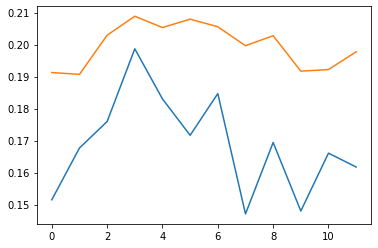

In [81]:
dm_b = data_b.groupby(['issue_date_m']).agg({'isDefault':'mean','issue_date_m':'count'}).rename(columns={'isDefault':'mean','issue_date_m':'count'}).reset_index()
dm_t = data_t.groupby(['issue_date_m']).agg({'is_default':'mean','issue_date_m':'count'}).rename(columns={'is_default':'mean','issue_date_m':'count'}).reset_index()
x=range(0,len(dy_b['count']))
y1=list(dm_b['mean'])
y2=list(dm_t['mean'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [82]:
dm_b['mean'].corr(dm_t['mean'],method='spearman')

0.7692307692307694

In [83]:
#相关性还是很高的

In [90]:
use_b = data_b.groupby(['use']).agg({'isDefault':'mean','use':'count'}).rename(columns={'isDefault':'mean','use':'count'}).reset_index().sort_values(by='count',ascending=False)

In [91]:
use_t = data_t.groupby(['use']).agg({'is_default':'mean','use':'count'}).rename(columns={'is_default':'mean','use':'count'}).reset_index().sort_values(by='count',ascending=False)

In [86]:
data_e.groupby(['use'])['use'].count()

use
0     2841
1       56
2      352
3      116
4     1111
5      282
6       38
7       27
8       45
9       73
10      44
11       3
12       9
13       3
Name: use, dtype: int64

In [92]:
use = pd.merge(use_b,use_t,on='use')

In [93]:
use

use    mean_x  count_x    mean_y  count_y
0     0  0.177314     5792  0.211288   435098
1     4  0.154806     2164  0.169238   164467
2     2  0.139752      644  0.176088    48896
3     5  0.157119      611  0.210515    43384
4     3  0.141509      212  0.191679    16465
5     1  0.241379      116  0.296062     8532
6     9  0.225225      111  0.216132     8666
7     8  0.160000      100  0.147305     8126
8     7  0.129870       77  0.195475     5039
9    10  0.152778       72  0.228788     5280
10    6  0.153846       65  0.225553     4070
11   12  0.173913       23  0.111635     1272
12   11  0.111111        9  0.239006      523
13   13  0.000000        4  0.192308      182

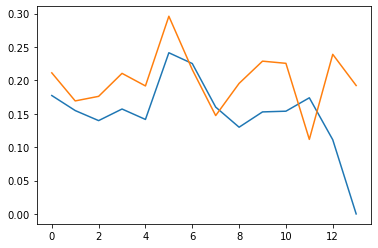

In [94]:
x=range(0,len(use['use']))
y1=list(use['mean_x'])
y2=list(use['mean_y'])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [97]:
#需要合并尾部类别

In [5]:
len(set(list(train_bank['post_code'])))

794

In [6]:
len(set(list(test_bank['post_code'])))

730

In [7]:
len(set(list(train_internet['post_code'])))

931

In [21]:
p_t_bank = train_bank.groupby(['post_code']).agg({'post_code':'count','isDefault':'mean'}).rename(columns={'post_code':'count','isDefault':'mean'}).sort_values(by='count',ascending=False).reset_index()

In [22]:
p_t_internet = train_internet.groupby(['post_code']).agg({'post_code':'count','is_default':'mean'}).rename(columns={'post_code':'count','is_default':'mean'}).sort_values(by='count',ascending=False).reset_index()

In [23]:
p_test = test_bank.groupby(['post_code']).agg({'post_code':'count'}).rename(columns={'post_code':'count'}).sort_values(by='count',ascending=False).reset_index()

In [20]:
p_t_bank.head(50)

post_code  count      mean
0          19    113  0.150442
1         134    104  0.134615
2          51    102  0.176471
3          31     99  0.161616
4           4     97  0.103093
5          17     89  0.123596
6         143     84  0.130952
7          32     83  0.180723
8         195     81  0.234568
9         116     76  0.144737
10         62     72  0.180556
11        167     70  0.185714
12        235     67  0.134328
13         38     66  0.151515
14         74     65  0.215385
15        171     64  0.078125
16         99     60  0.183333
17         79     60  0.150000
18         89     60  0.150000
19        141     59  0.186441
20         72     59  0.203390
21        111     58  0.189655
22        108     56  0.160714
23         48     56  0.107143
24        104     56  0.285714
25        275     55  0.145455
26        230     55  0.163636
27        197     54  0.185185
28         97     54  0.185185
29         25     52  0.153846
30        162     52  0.115385
31         33     52  0.153846
32        277     51  0.235294
33         64     51  0.156863
34        157     49  0.204082
35        124     49  0.142857
36        196     49  0.163265
37        156     46  0.217391
38        188     45  0.133333
39         29     44  0.159091
40        324     43  0.186047
41        480     42  0.095238
42        149     42  0.142857
43        161     42  0.142857
44        408     41  0.146341
45        242     41  0.121951
46        177     41  0.073171
47        495     41  0.097561
48        160     41  0.121951
49        512     40  0.250000

In [21]:
p_t_internet.head(50)

post_code  count      mean
0       134.0   8402  0.177934
1        19.0   8042  0.176076
2        51.0   7659  0.226923
3        31.0   6873  0.162084
4         4.0   6715  0.171854
5        32.0   6269  0.237518
6       143.0   5967  0.195408
7        74.0   5956  0.206682
8       195.0   5877  0.232261
9        17.0   5869  0.177202
10      116.0   5869  0.200545
11       38.0   5502  0.230098
12      167.0   5355  0.207283
13      141.0   5309  0.261820
14       62.0   5158  0.218302
15       48.0   4854  0.197775
16      277.0   4575  0.205464
17      111.0   4522  0.199248
18      235.0   4485  0.197993
19       99.0   4385  0.194755
20      108.0   4094  0.219101
21      104.0   3978  0.205380
22      324.0   3918  0.203675
23      124.0   3850  0.216623
24      157.0   3844  0.190687
25       79.0   3764  0.207492
26      177.0   3703  0.167162
27      230.0   3667  0.190074
28      129.0   3646  0.226275
29      161.0   3641  0.199945
30      196.0   3629  0.188482
31      171.0   3614  0.195905
32       33.0   3609  0.145193
33      275.0   3593  0.205678
34       89.0   3591  0.177666
35      156.0   3543  0.152695
36      162.0   3536  0.189762
37       72.0   3502  0.183324
38       97.0   3448  0.241879
39       63.0   3380  0.201775
40      186.0   3296  0.162925
41      480.0   3218  0.207893
42      136.0   3196  0.134230
43      112.0   3181  0.208425
44      408.0   3135  0.207656
45      149.0   3115  0.164045
46      221.0   3080  0.195455
47      242.0   3041  0.189740
48        9.0   2982  0.192488
49       25.0   2961  0.234718

In [22]:
p_test.head(50)

post_code  count
0          19     62
1         134     61
2          31     52
3          51     48
4           4     46
5          74     45
6         167     44
7         116     42
8         141     38
9          48     36
10        235     35
11         32     35
12         17     33
13        186     33
14        111     33
15        277     32
16        143     32
17        195     32
18         38     31
19        124     31
20         89     29
21        136     29
22         79     28
23        129     28
24        156     27
25         99     27
26         97     26
27        138     26
28        242     25
29        275     25
30         62     25
31        215     25
32        162     24
33         66     24
34        418     23
35         33     23
36        171     23
37         63     23
38        196     23
39        108     22
40        112     22
41         72     22
42        160     22
43        109     21
44          5     21
45         25     21
46         27     20
47        286     20
48         91     20
49          9     20

In [23]:
#不同邮编地区的违约率还是有很大差别的

In [24]:
post_code_merge = pd.merge(p_t_bank, p_t_internet, on='post_code').sort_values(by='count_x',ascending=False).reset_index(drop=True)

In [25]:
post_code_merge.head(50)

post_code  count_x    mean_x  count_y    mean_y
0          19      113  0.150442     8042  0.176076
1         134      104  0.134615     8402  0.177934
2          51      102  0.176471     7659  0.226923
3          31       99  0.161616     6873  0.162084
4           4       97  0.103093     6715  0.171854
5          17       89  0.123596     5869  0.177202
6         143       84  0.130952     5967  0.195408
7          32       83  0.180723     6269  0.237518
8         195       81  0.234568     5877  0.232261
9         116       76  0.144737     5869  0.200545
10         62       72  0.180556     5158  0.218302
11        167       70  0.185714     5355  0.207283
12        235       67  0.134328     4485  0.197993
13         38       66  0.151515     5502  0.230098
14         74       65  0.215385     5956  0.206682
15        171       64  0.078125     3614  0.195905
16         99       60  0.183333     4385  0.194755
17         79       60  0.150000     3764  0.207492
18         89       60  0.150000     3591  0.177666
19        141       59  0.186441     5309  0.261820
20         72       59  0.203390     3502  0.183324
21        111       58  0.189655     4522  0.199248
22        108       56  0.160714     4094  0.219101
23         48       56  0.107143     4854  0.197775
24        104       56  0.285714     3978  0.205380
25        230       55  0.163636     3667  0.190074
26        275       55  0.145455     3593  0.205678
27        197       54  0.185185     2957  0.192763
28         97       54  0.185185     3448  0.241879
29         25       52  0.153846     2961  0.234718
30        162       52  0.115385     3536  0.189762
31         33       52  0.153846     3609  0.145193
32        277       51  0.235294     4575  0.205464
33         64       51  0.156863     2772  0.132395
34        157       49  0.204082     3844  0.190687
35        124       49  0.142857     3850  0.216623
36        196       49  0.163265     3629  0.188482
37        156       46  0.217391     3543  0.152695
38        188       45  0.133333     2452  0.192088
39         29       44  0.159091     2518  0.221207
40        324       43  0.186047     3918  0.203675
41        480       42  0.095238     3218  0.207893
42        149       42  0.142857     3115  0.164045
43        161       42  0.142857     3641  0.199945
44        408       41  0.146341     3135  0.207656
45        242       41  0.121951     3041  0.189740
46        177       41  0.073171     3703  0.167162
47        495       41  0.097561     2773  0.203029
48        160       41  0.121951     2833  0.181786
49        221       40  0.075000     3080  0.195455

In [27]:
post_code_merge.sort_values(by='count_y',ascending=True).head(30)

post_code  count_x  mean_x  count_y    mean_y
770        876        1     1.0        4  0.000000
760        822        1     0.0        4  0.000000
772        872        1     0.0       11  0.181818
790        835        1     0.0       24  0.166667
766        865        1     0.0       24  0.250000
792        803        1     0.0       28  0.142857
774        842        1     0.0       33  0.181818
693        845        2     0.0       33  0.090909
723        452        1     0.0       44  0.227273
718        774        1     1.0       45  0.200000
758        852        1     0.0       48  0.125000
769        817        1     0.0       50  0.300000
708        834        2     0.0       50  0.380000
757        848        1     0.0       51  0.274510
690        805        2     0.5       52  0.326923
762        853        1     1.0       54  0.166667
580        759        3     0.0       55  0.145455
719        637        1     0.0       56  0.142857
765        843        1     0.0       59  0.220339
767        813        1     0.0       61  0.163934
577        578        3     0.0       61  0.262295
621        801        3     0.0       62  0.290323
637        788        2     0.0       64  0.390625
771        815        1     0.0       65  0.169231
647        350        2     0.5       65  0.184615
763        861        1     0.0       65  0.184615
666        819        2     0.0       70  0.171429
676        728        2     0.0       70  0.228571
778        513        1     1.0       71  0.084507
756        826        1     1.0       71  0.239437

In [95]:
post_code_merge['mean_x'][0:50].corr(post_code_merge['mean_y'][0:50],method='spearman')

0.27774843219435075

In [30]:
#弱相关

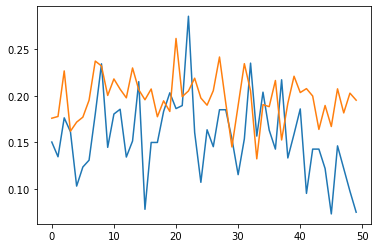

In [96]:
x=range(0,50)
y1=list(post_code_merge['mean_x'][0:50])
y2=list(post_code_merge['mean_y'][0:50])
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [97]:
post_code_merge['mean_x'][0:40].corr(post_code_merge['mean_y'][0:40],method='spearman')

0.2618567366551451

In [98]:
post_code_merge['mean_x'][0:35].corr(post_code_merge['mean_y'][0:35],method='spearman')

0.3650626962992884

In [99]:
post_code_merge['mean_x'][0:30].corr(post_code_merge['mean_y'][0:30],method='spearman')

0.41967068239704786

In [100]:
post_code_merge['mean_x'][0:25].corr(post_code_merge['mean_y'][0:25],method='spearman')

0.4727832362894154

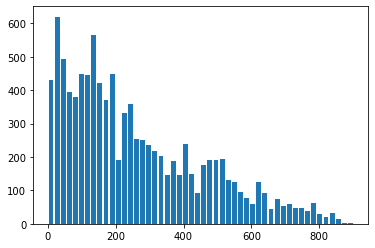

In [101]:
plt.hist(train_bank['post_code'], 50, histtype='bar', rwidth=0.8)
plt.show()

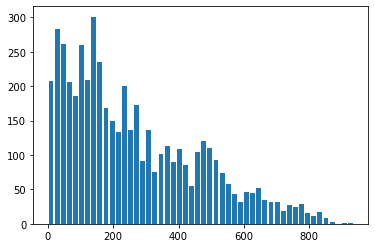

In [102]:
plt.hist(test_bank['post_code'], 50, histtype='bar', rwidth=0.8)
plt.show()

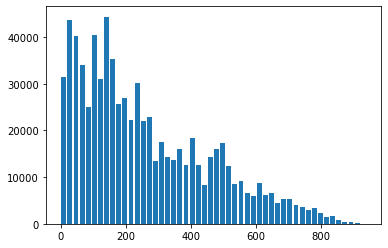

In [103]:
plt.hist(train_internet['post_code'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [106]:
post_code_merge

index  post_code  count_x    mean_x  count_y    mean_y
0        0         19      113  0.150442     8042  0.176076
1        1        134      104  0.134615     8402  0.177934
2        2         51      102  0.176471     7659  0.226923
3        3         31       99  0.161616     6873  0.162084
4        4          4       97  0.103093     6715  0.171854
..     ...        ...      ...       ...      ...       ...
789    791        647        1  0.000000      112  0.151786
790    749        252        1  0.000000      250  0.260000
791    765        366        1  0.000000      123  0.235772
792    774        762        1  0.000000      240  0.179167
793    727        822        1  0.000000        4  0.000000

[794 rows x 6 columns]

In [118]:
for i in range(1,50):
	print(post_code_merge[post_code_merge['count_x']==i]['count_x'].sum())

79
160
183
292
205
306
287
256
342
170
264
132
286
252
195
144
187
288
171
40
147
242
184
192
150
104
108
140
87
120
62
64
231
170
245
252
0
38
117
120
205
126
43
44
45
46
0
0
147


In [115]:
len(set(list(train_bank.post_code)+list(train_internet.post_code)+list(test_bank.post_code)))

932

In [116]:
len(set(list(train_bank.post_code)+list(test_bank.post_code)))

822

In [117]:
len(set(list(train_bank.post_code)))

794

In [7]:
data_bt = pd.concat([train_bank, test_bank])

In [13]:
data_bt_group = data_bt.groupby(['post_code']).agg({'post_code':'count'}).rename(columns={'post_code':'p_count'}).sort_values(by='p_count',ascending=True).reset_index()

In [19]:
data_bt_group.groupby(['p_count']).agg({'p_count':'count'}).rename(columns={'p_count':'count'}).sort_values(by='p_count',ascending=True).reset_index().head(50)

p_count  count
0         1     54
1         2     57
2         3     53
3         4     46
4         5     49
5         6     41
6         7     36
7         8     34
8         9     31
9        10     35
10       11     23
11       12     19
12       13     21
13       14     21
14       15     17
15       16     11
16       17     17
17       18      7
18       19      9
19       20     20
20       21     11
21       22     11
22       23      8
23       24      6
24       25      6
25       26      5
26       27      9
27       28      9
28       29      5
29       30     11
30       31      3
31       32      5
32       33      7
33       34      5
34       35      3
35       36      5
36       37      5
37       38      4
38       39      1
39       40      4
40       41      3
41       42      3
42       43      2
43       44      1
44       45      1
45       46      2
46       47      3
47       48      5
48       49      3
49       50      5

In [30]:
data_b.groupby(['region']).agg({'region':'count','isDefault':'mean'}).rename(columns={'region':'count','isDefault':'mean'}).sort_values(by='count',ascending=False).reset_index()

region  count      mean
0        8   1414  0.157001
1       13    832  0.163462
2       14    799  0.153942
3       21    678  0.187316
4        2    410  0.153659
5       19    366  0.174863
6        0    342  0.160819
7        3    338  0.153846
8       30    318  0.179245
9        9    280  0.157143
10       7    262  0.198473
11      23    260  0.226923
12      12    253  0.166008
13      10    245  0.175510
14      26    227  0.140969
15      22    224  0.138393
16      18    199  0.190955
17       4    191  0.209424
18      24    181  0.193370
19      38    159  0.226415
20      11    155  0.167742
21      36    155  0.148387
22      27    136  0.132353
23      32    129  0.155039
24      17    129  0.209302
25      20    116  0.241379
26      35    112  0.160714
27       5    110  0.154545
28      15    104  0.096154
29      43    101  0.138614
30      42     80  0.250000
31      37     77  0.272727
32      45     68  0.147059
33      16     57  0.140351
34      33     53  0.169811
35      44     51  0.235294
36      28     50  0.100000
37       6     49  0.204082
38      39     43  0.069767
39      31     38  0.157895
40      40     38  0.078947
41      25     36  0.083333
42      41     25  0.080000
43      34     21  0.142857
44       1     19  0.263158
45      48     19  0.105263
46      47     18  0.111111
47      29     14  0.071429
48      46     10  0.200000
49      49      9  0.444444

In [31]:
data_t.groupby(['region']).agg({'region':'count','is_default':'mean'}).rename(columns={'region':'count','is_default':'mean'}).sort_values(by='count',ascending=False).reset_index()

region   count      mean
0        8  109597  0.194969
1       14   61683  0.197218
2       13   60995  0.219887
3       21   53295  0.215161
4        2   28601  0.181427
5       30   26873  0.210918
6        0   25461  0.207651
7       19   24543  0.207636
8        3   24141  0.186612
9        9   21477  0.201518
10       7   21122  0.208740
11      23   19660  0.203306
12      10   18396  0.199065
13      12   17346  0.212383
14      26   17252  0.189485
15      22   16631  0.156214
16      18   16233  0.158997
17       4   13269  0.195493
18      11   12150  0.212016
19      24   11975  0.212192
20      32   11310  0.212467
21      38   11238  0.216320
22      36   10905  0.173040
23      27    9879  0.186051
24      17    9232  0.234402
25      35    9045  0.141294
26       5    8983  0.159190
27      20    8518  0.235266
28      43    7190  0.212100
29      42    6834  0.236465
30      15    6224  0.165488
31      37    5632  0.243786
32      45    5544  0.169192
33      16    4019  0.211993
34      28    3810  0.200000
35      44    3724  0.263695
36      33    3570  0.147059
37       6    3275  0.175573
38      39    2755  0.158984
39      40    2139  0.168770
40      31    2119  0.191128
41      34    2008  0.252988
42      25    1959  0.135273
43      48    1772  0.203725
44      41    1657  0.175015
45       1    1517  0.206328
46      29    1455  0.142268
47      47    1135  0.137445
48      49     956  0.185146
49      46     891  0.205387
50      50       5  0.000000

In [32]:
data_e.groupby(['region']).agg({'region':'count'}).rename(columns={'region':'count'}).sort_values(by='count',ascending=False).reset_index()

region  count
0        8    762
1       14    408
2       13    399
3       21    302
4       30    192
5        0    189
6        2    185
7       19    163
8        3    157
9        9    150
10       7    141
11      26    131
12      12    119
13      10    111
14      23    110
15      22    108
16      18    105
17       4    104
18      24     76
19      32     74
20      11     74
21      35     70
22      20     69
23      38     68
24       5     67
25      36     67
26      43     54
27      17     54
28      27     50
29      37     49
30      15     49
31      42     47
32      45     44
33      16     36
34      33     26
35      44     23
36      28     22
37      39     16
38      34     16
39      41     15
40      25     15
41      31     13
42       6     13
43      48     11
44      40     10
45       1      9
46      29      8
47      46      8
48      47      7
49      49      4

In [33]:
region_b = data_b.groupby(['region']).agg({'region':'count','isDefault':'mean'}).rename(columns={'region':'count','isDefault':'mean'}).sort_values(by='count',ascending=False).reset_index()
region_t = data_t.groupby(['region']).agg({'region':'count','is_default':'mean'}).rename(columns={'region':'count','is_default':'mean'}).sort_values(by='count',ascending=False).reset_index()
region_merge = pd.merge(region_b, region_t, on='region')

In [34]:
region_merge

region  count_x    mean_x  count_y    mean_y
0        8     1414  0.157001   109597  0.194969
1       13      832  0.163462    60995  0.219887
2       14      799  0.153942    61683  0.197218
3       21      678  0.187316    53295  0.215161
4        2      410  0.153659    28601  0.181427
5       19      366  0.174863    24543  0.207636
6        0      342  0.160819    25461  0.207651
7        3      338  0.153846    24141  0.186612
8       30      318  0.179245    26873  0.210918
9        9      280  0.157143    21477  0.201518
10       7      262  0.198473    21122  0.208740
11      23      260  0.226923    19660  0.203306
12      12      253  0.166008    17346  0.212383
13      10      245  0.175510    18396  0.199065
14      26      227  0.140969    17252  0.189485
15      22      224  0.138393    16631  0.156214
16      18      199  0.190955    16233  0.158997
17       4      191  0.209424    13269  0.195493
18      24      181  0.193370    11975  0.212192
19      38      159  0.226415    11238  0.216320
20      11      155  0.167742    12150  0.212016
21      36      155  0.148387    10905  0.173040
22      27      136  0.132353     9879  0.186051
23      32      129  0.155039    11310  0.212467
24      17      129  0.209302     9232  0.234402
25      20      116  0.241379     8518  0.235266
26      35      112  0.160714     9045  0.141294
27       5      110  0.154545     8983  0.159190
28      15      104  0.096154     6224  0.165488
29      43      101  0.138614     7190  0.212100
30      42       80  0.250000     6834  0.236465
31      37       77  0.272727     5632  0.243786
32      45       68  0.147059     5544  0.169192
33      16       57  0.140351     4019  0.211993
34      33       53  0.169811     3570  0.147059
35      44       51  0.235294     3724  0.263695
36      28       50  0.100000     3810  0.200000
37       6       49  0.204082     3275  0.175573
38      39       43  0.069767     2755  0.158984
39      31       38  0.157895     2119  0.191128
40      40       38  0.078947     2139  0.168770
41      25       36  0.083333     1959  0.135273
42      41       25  0.080000     1657  0.175015
43      34       21  0.142857     2008  0.252988
44       1       19  0.263158     1517  0.206328
45      48       19  0.105263     1772  0.203725
46      47       18  0.111111     1135  0.137445
47      29       14  0.071429     1455  0.142268
48      46       10  0.200000      891  0.205387
49      49        9  0.444444      956  0.185146

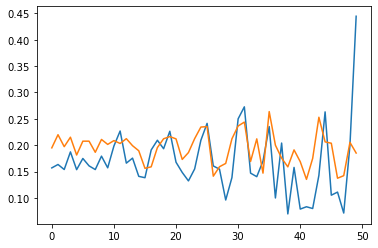

In [36]:
x=range(0,50)
y1=region_merge.mean_x
y2=region_merge.mean_y
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [37]:
region_merge_t = region_merge.sort_values(by='count_y',ascending=False)

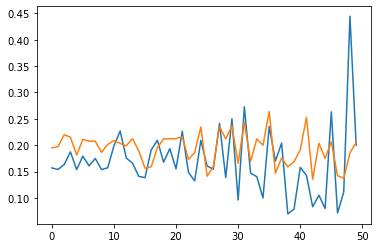

In [38]:
x=range(0,50)
y1=region_merge_t.mean_x
y2=region_merge_t.mean_y
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [39]:
region_merge_t.mean_x.corr(region_merge_t.mean_y,method='spearman')

0.5445858343337334

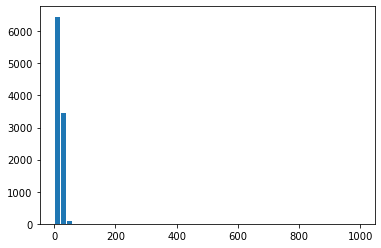

In [42]:
plt.hist(train_bank['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

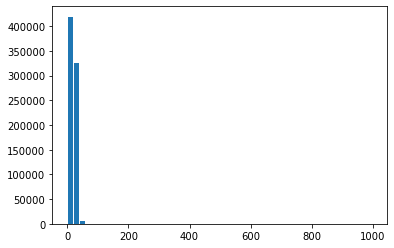

In [50]:
plt.hist(train_internet['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

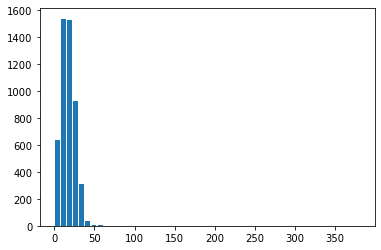

In [44]:
plt.hist(test_bank['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [57]:
# 有少数离群点，可能是因为收入过低造成的

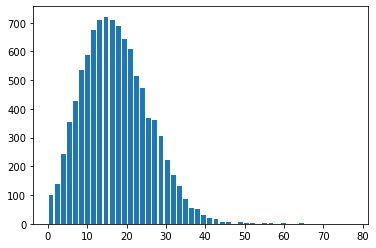

In [63]:
plt.hist(train_bank[train_bank['debt_loan_ratio']<80]['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

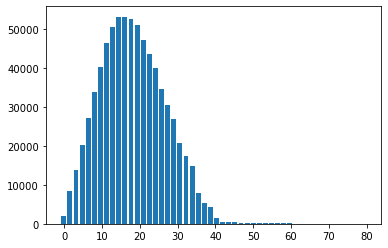

In [64]:
plt.hist(train_internet[train_internet['debt_loan_ratio']<80]['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

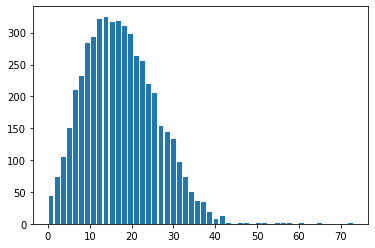

In [65]:
plt.hist(test_bank[test_bank['debt_loan_ratio']<80]['debt_loan_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [94]:
dlr_bin = [0, 10, 15, 20, 25, 30, 35, 40, 45, data_b['debt_loan_ratio'].max()]
dlr_labels = [i for i in range(len(dlr_bin)-1)]
data_b['dlr_bin'] = pd.cut(data_b['debt_loan_ratio'], dlr_bin, labels=dlr_labels)
data_b.groupby(['dlr_bin']).agg({'isDefault':'mean','dlr_bin':'count'}).rename(columns={'isDefault':'mean','dlr_bin':'count'}).reset_index()

dlr_bin      mean  count
0       0  0.122130   2047
1       1  0.143184   2186
2       2  0.173423   2220
3       3  0.176230   1708
4       4  0.230483   1076
5       5  0.234000    500
6       6  0.268293    164
7       7  0.294118     51
8       8  0.250000     36

In [95]:
data_t['dlr_bin'] = pd.cut(data_t['debt_loan_ratio'], dlr_bin, labels=dlr_labels)
data_t.groupby(['dlr_bin']).agg({'is_default':'mean','dlr_bin':'count'}).rename(columns={'is_default':'mean','dlr_bin':'count'}).reset_index()

dlr_bin      mean   count
0       0  0.149312  136627
1       1  0.165712  152590
2       2  0.190498  160994
3       3  0.216549  134302
4       4  0.249087   93128
5       5  0.284143   52273
6       6  0.310905   15635
7       7  0.319878    1313
8       8  0.313248    2423

In [96]:
data_e['dlr_bin'] = pd.cut(data_e['debt_loan_ratio'], dlr_bin, labels=dlr_labels)
data_e.groupby(['dlr_bin']).agg({'dlr_bin':'count'}).rename(columns={'dlr_bin':'count'}).reset_index()

dlr_bin  count
0       0   1043
1       1   1070
2       2   1056
3       3    871
4       4    548
5       5    283
6       6     92
7       7     18
8       8     14

In [97]:
dlr_b = data_b.groupby(['dlr_bin']).agg({'isDefault':'mean','dlr_bin':'count'}).rename(columns={'isDefault':'mean','dlr_bin':'count'}).reset_index()
dlr_t = data_t.groupby(['dlr_bin']).agg({'is_default':'mean','dlr_bin':'count'}).rename(columns={'is_default':'mean','dlr_bin':'count'}).reset_index()
dlr_merge = pd.merge(dlr_b,dlr_t,on='dlr_bin')

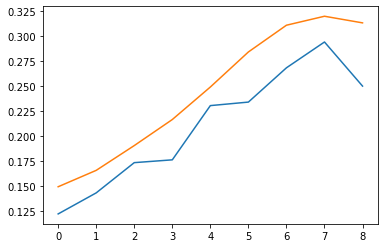

In [98]:
x=range(0,9)
y1=dlr_merge.mean_x
y2=dlr_merge.mean_y
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

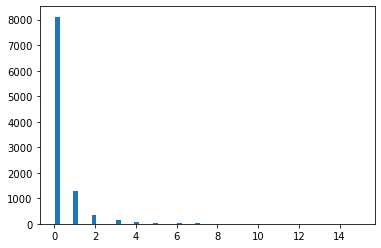

In [99]:
plt.hist(train_bank['del_in_18month'], 50, histtype='bar', rwidth=0.8)
plt.show()

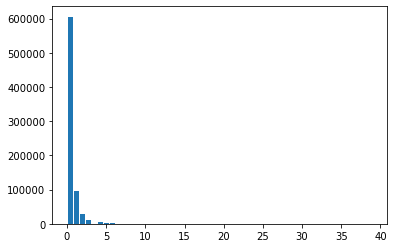

In [100]:
plt.hist(train_internet['del_in_18month'], 50, histtype='bar', rwidth=0.8)
plt.show()

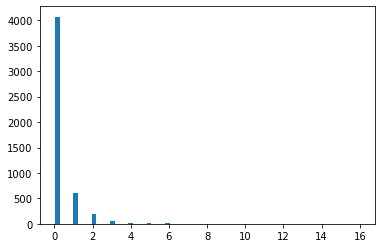

In [101]:
plt.hist(test_bank['del_in_18month'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [23]:
d18_bin = [-1, 0, 1, data_b['del_in_18month'].max()]
d18_labels = [i for i in range(len(d18_bin)-1)]
data_b['d18_bin'] = pd.cut(data_b['del_in_18month'], d18_bin, labels=d18_labels)
data_b.groupby(['d18_bin']).agg({'isDefault':'mean','d18_bin':'count'}).rename(columns={'isDefault':'mean','d18_bin':'count'}).reset_index()

d18_bin      mean  count
0       0  0.164387   8115
1       1  0.183899   1267
2       2  0.187702    618

In [111]:
data_t['d18_bin'] = pd.cut(data_t['del_in_18month'], d18_bin, labels=d18_labels)
data_t.groupby(['d18_bin']).agg({'is_default':'mean','d18_bin':'count'}).rename(columns={'is_default':'mean','d18_bin':'count'}).reset_index()

d18_bin      mean   count
0       0  0.195928  605314
1       1  0.208346   96162
2       2  0.227480   48457

In [112]:
data_e['d18_bin'] = pd.cut(data_e['del_in_18month'], d18_bin, labels=d18_labels)
data_e.groupby(['d18_bin']).agg({'d18_bin':'count'}).rename(columns={'d18_bin':'count'}).reset_index()

d18_bin  count
0       0   4072
1       1    615
2       2    312

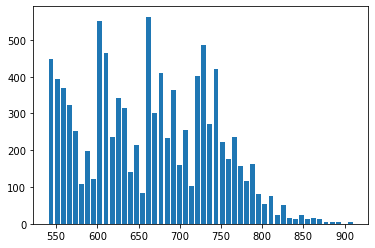

In [113]:
plt.hist(train_bank['scoring_low'], 50, histtype='bar', rwidth=0.8)
plt.show()

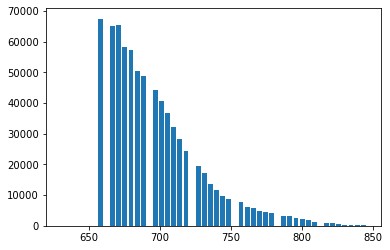

In [114]:
plt.hist(train_internet['scoring_low'], 50, histtype='bar', rwidth=0.8)
plt.show()

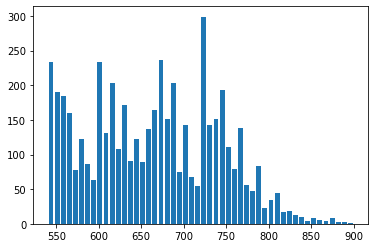

In [115]:
plt.hist(test_bank['scoring_low'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [123]:
s_low_bin = [550, 600, 650, 700, 750, 800, data_b['scoring_low'].max()]
s_low_labels = [i for i in range(len(s_low_bin)-1)]
data_b['s_low_bin'] = pd.cut(data_b['scoring_low'], s_low_bin, labels=s_low_labels)
data_b.groupby(['s_low_bin']).agg({'isDefault':'mean','s_low_bin':'count'}).rename(columns={'isDefault':'mean','s_low_bin':'count'}).reset_index()

s_low_bin      mean  count
0         0  0.185880   1813
1         1  0.165500   2000
2         2  0.177746   2121
3         3  0.161668   1967
4         4  0.130742   1132
5         5  0.108626    313

In [124]:
data_t['s_low_bin'] = pd.cut(data_t['scoring_low'], s_low_bin, labels=s_low_labels)
data_t.groupby(['s_low_bin']).agg({'is_default':'mean','s_low_bin':'count'}).rename(columns={'is_default':'mean','s_low_bin':'count'}).reset_index()

s_low_bin      mean   count
0         0       NaN       0
1         1  0.000000       1
2         2  0.232064  497592
3         3  0.147839  201746
4         4  0.089807   44228
5         5  0.062490    6433

In [125]:
data_e['s_low_bin'] = pd.cut(data_e['scoring_low'], s_low_bin, labels=s_low_labels)
data_e.groupby(['s_low_bin']).agg({'s_low_bin':'count'}).rename(columns={'s_low_bin':'count'}).reset_index()

s_low_bin  count
0         0    908
1         1    994
2         2   1096
3         3    979
4         4    529
5         5    172

In [126]:
# internet编码的时候要注意一下

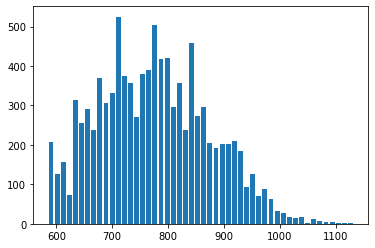

In [127]:
plt.hist(train_bank['scoring_high'], 50, histtype='bar', rwidth=0.8)
plt.show()

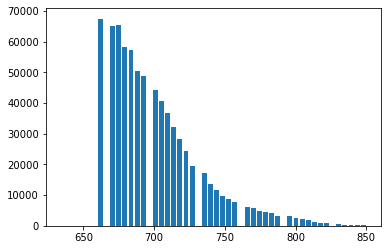

In [128]:
plt.hist(train_internet['scoring_high'], 50, histtype='bar', rwidth=0.8)
plt.show()

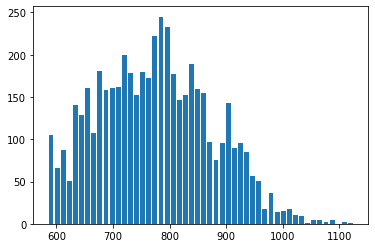

In [129]:
plt.hist(test_bank['scoring_high'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [133]:
s_high_bin = [550, 600, 650, 700, 750, 800, 850, data_b['scoring_high'].max()]
s_high_labels = [i for i in range(len(s_high_bin)-1)]
data_b['s_high_bin'] = pd.cut(data_b['scoring_high'], s_high_bin, labels=s_high_labels)
data_b.groupby(['s_high_bin']).agg({'isDefault':'mean','s_high_bin':'count'}).rename(columns={'isDefault':'mean','s_high_bin':'count'}).reset_index()

s_high_bin      mean  count
0          0  0.232472    271
1          1  0.200000    860
2          2  0.178896   1431
3          3  0.174870   1727
4          4  0.165595   1866
5          5  0.165486   1553
6          6  0.141361   2292

In [135]:
data_t['s_high_bin'] = pd.cut(data_t['scoring_high'], s_high_bin, labels=s_high_labels)
data_t.groupby(['s_high_bin']).agg({'is_default':'mean','s_high_bin':'count'}).rename(columns={'is_default':'mean','s_high_bin':'count'}).reset_index()

s_high_bin      mean   count
0          0       NaN       0
1          1  0.000000       1
2          2  0.235886  457034
3          3  0.156647  233493
4          4  0.092951   50930
5          5  0.064973    8542
6          6       NaN       0

In [136]:
data_t[data_t['scoring_high']<650]

loan_id  user_id  total_loan  year_of_loan  interest  monthly_payment  \
294408   167297   294408      1500.0             3      14.7            51.78   

       class sub_class work_type employer_type         industry work_year  \
294408     E        E5        职员          普通企业  信息传输、软件和信息技术服务业    1 year   

        house_exist  house_loan_status  censor_status  marriage  offsprings  \
294408            1                  2              0         0           0   

        issue_date  use  post_code  region  debt_loan_ratio  del_in_18month  \
294408  2007-11-01    5       28.0      12             3.84             1.0   

        scoring_low  scoring_high  pub_dero_bankrup  early_return  \
294408        630.0         634.0               NaN             0   

        early_return_amount  early_return_amount_3mon  recircle_b  recircle_u  \
294408                    0                       0.0      1238.0        61.9   

        initial_list_status earlies_credit_mon    title  policy_code  f0  f1  \
294408                    1           Aug-2003  20866.0          1.0 NaN NaN   

        f2  f3  f4  f5  is_default   income dlr_bin d18_bin s_low_bin  \
294408 NaN NaN NaN NaN           0  390.625       0       1         1   

       s_high_bin  
294408          1

In [139]:
#internet里有一条评分低于650，编码的时候划入650-700

In [140]:
#可以看出bank和internet不同评分段的违约率是不一样的，但是单调性一样

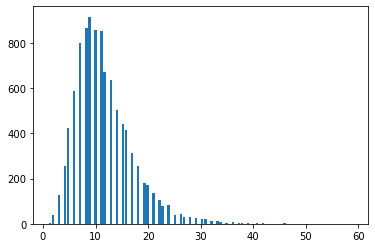

In [142]:
plt.hist(train_bank['known_outstanding_loan'], 100, histtype='bar', rwidth=0.8)
plt.show()

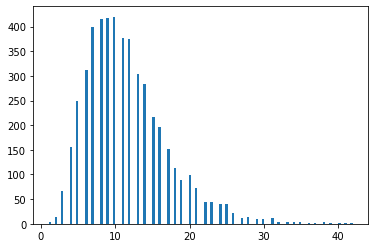

In [144]:
plt.hist(test_bank['known_outstanding_loan'], 100, histtype='bar', rwidth=0.8)
plt.show()

In [146]:
kol_bin = [0, 5, 10, 15, 20, 25, 30, data_b['known_outstanding_loan'].max()]
kol_labels = [i for i in range(len(kol_bin)-1)]
data_b['kol_bin'] = pd.cut(data_b['known_outstanding_loan'], kol_bin, labels=kol_labels)
data_b.groupby(['kol_bin']).agg({'isDefault':'mean','kol_bin':'count'}).rename(columns={'isDefault':'mean','kol_bin':'count'}).reset_index()

kol_bin      mean  count
0       0  0.144706    850
1       1  0.152071   4031
2       2  0.177134   3105
3       3  0.174925   1332
4       4  0.198661    448
5       5  0.275168    149
6       6  0.400000     85

In [147]:
data_e['kol_bin'] = pd.cut(data_e['known_outstanding_loan'], kol_bin, labels=kol_labels)
data_e.groupby(['kol_bin']).agg({'kol_bin':'count'}).rename(columns={'kol_bin':'count'}).reset_index()

kol_bin  count
0       0    488
1       1   1963
2       2   1555
3       3    648
4       4    243
5       5     65
6       6     38

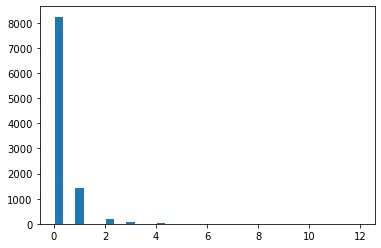

In [149]:
plt.hist(train_bank['known_dero'], 30, histtype='bar', rwidth=0.8)
plt.show()

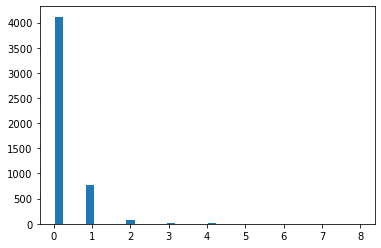

In [150]:
plt.hist(test_bank['known_dero'], 30, histtype='bar', rwidth=0.8)
plt.show()

In [152]:
kd_bin = [-1, 0, 1, data_b['known_dero'].max()]
kd_labels = [i for i in range(len(kd_bin)-1)]
data_b['kd_bin'] = pd.cut(data_b['known_dero'], kd_bin, labels=kd_labels)
data_b.groupby(['kd_bin']).agg({'isDefault':'mean','kd_bin':'count'}).rename(columns={'isDefault':'mean','kd_bin':'count'}).reset_index()

kd_bin      mean  count
0      0  0.160364   8250
1      1  0.188194   1440
2      2  0.287097    310

In [153]:
data_e['kd_bin'] = pd.cut(data_e['known_dero'], kd_bin, labels=kd_labels)
data_e.groupby(['kd_bin']).agg({'kd_bin':'count'}).rename(columns={'kd_bin':'count'}).reset_index()

kd_bin  count
0      0   4116
1      1    772
2      2    112

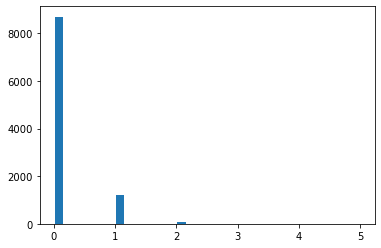

In [155]:
plt.hist(train_bank['pub_dero_bankrup'], 20, histtype='bar', rwidth=0.8)
plt.show()

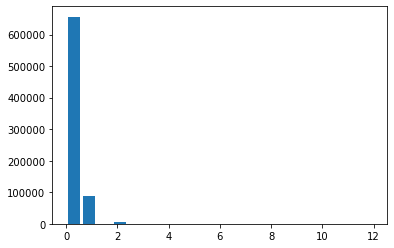

In [159]:
plt.hist(train_internet['pub_dero_bankrup'], 20, histtype='bar', rwidth=0.8)
plt.show()

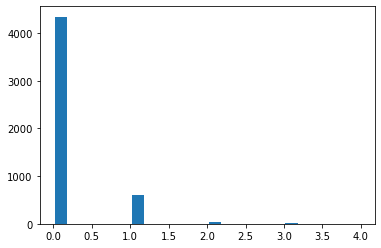

In [158]:
plt.hist(test_bank['pub_dero_bankrup'], 20, histtype='bar', rwidth=0.8)
plt.show()

In [160]:
pdb_bin = [-1, 0, 1, data_b['pub_dero_bankrup'].max()]
pdb_labels = [i for i in range(len(pdb_bin)-1)]
data_b['pdb_bin'] = pd.cut(data_b['pub_dero_bankrup'], pdb_bin, labels=pdb_labels)
data_b.groupby(['pdb_bin']).agg({'isDefault':'mean','pdb_bin':'count'}).rename(columns={'isDefault':'mean','pdb_bin':'count'}).reset_index()

pdb_bin      mean  count
0       0  0.162815   8697
1       1  0.197874   1223
2       2  0.328767     73

In [161]:
data_t['pdb_bin'] = pd.cut(data_t['pub_dero_bankrup'], pdb_bin, labels=pdb_labels)
data_t.groupby(['pdb_bin']).agg({'is_default':'mean','pdb_bin':'count'}).rename(columns={'is_default':'mean','pdb_bin':'count'}).reset_index()

pdb_bin      mean   count
0       0  0.195605  656470
1       1  0.226566   87630
2       2  0.242888    5484

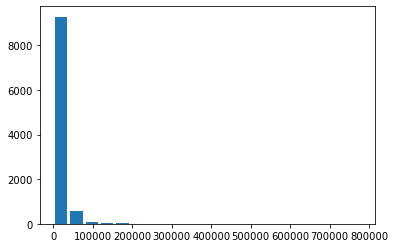

In [162]:
plt.hist(train_bank['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

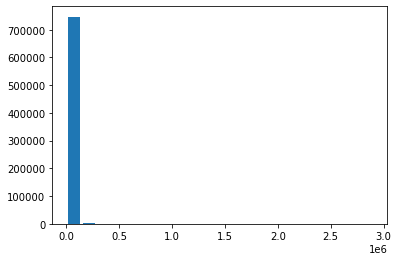

In [163]:
plt.hist(train_internet['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

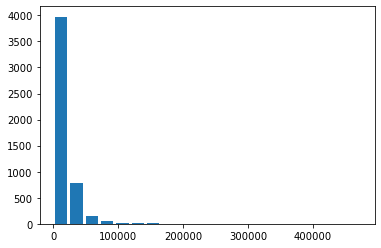

In [164]:
plt.hist(test_bank['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

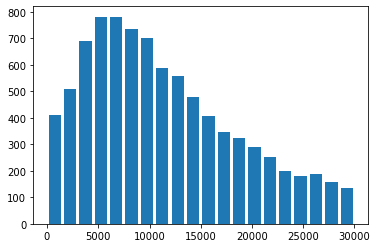

In [178]:
plt.hist(train_bank[train_bank['recircle_b']<30000]['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

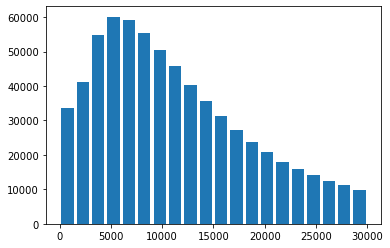

In [179]:
plt.hist(train_internet[train_internet['recircle_b']<30000]['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

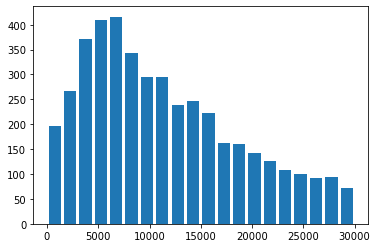

In [181]:
plt.hist(test_bank[test_bank['recircle_b']<30000]['recircle_b'], 20, histtype='bar', rwidth=0.8)
plt.show()

In [182]:
rb_bin = [-1, 3000, 6000, 8000, 12000, 15000, 20000, 25000, 30000, 50000, data_b['recircle_b'].max()]
rb_labels = [i for i in range(len(rb_bin)-1)]
data_b['rb_bin'] = pd.cut(data_b['recircle_b'], rb_bin, labels=rb_labels)
data_b.groupby(['rb_bin']).agg({'isDefault':'mean','rb_bin':'count'}).rename(columns={'isDefault':'mean','rb_bin':'count'}).reset_index()

rb_bin      mean  count
0      0  0.163043    920
1      1  0.183424   1472
2      2  0.169307   1010
3      3  0.176405   1797
4      4  0.179537   1036
5      5  0.155632   1163
6      6  0.160000    775
7      7  0.165441    544
8      8  0.160793    908
9      9  0.128000    375

In [184]:
data_t['rb_bin'] = pd.cut(data_t['recircle_b'], rb_bin, labels=rb_labels)
data_t.groupby(['rb_bin']).agg({'is_default':'mean','rb_bin':'count'}).rename(columns={'is_default':'mean','rb_bin':'count'}).reset_index()

rb_bin      mean   count
0      0  0.198332   74703
1      1  0.198449  115052
2      2  0.201554   78262
3      3  0.206372  132872
4      4  0.206745   75963
5      5  0.207622   89528
6      6  0.202834   57086
7      7  0.192161   38067
8      8  0.185416   62368
9      9  0.156268   26077

In [185]:
data_e['rb_bin'] = pd.cut(data_e['recircle_b'], rb_bin, labels=rb_labels)
data_e.groupby(['rb_bin']).agg({'rb_bin':'count'}).rename(columns={'rb_bin':'count'}).reset_index()

rb_bin  count
0      0    463
1      1    781
2      2    524
3      3    823
4      4    485
5      5    595
6      6    396
7      7    293
8      8    437
9      9    203

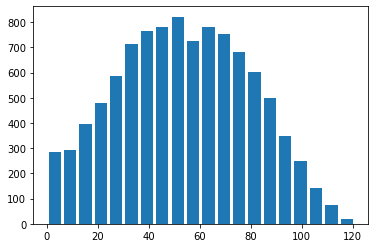

In [186]:
plt.hist(train_bank['recircle_u'], 20, histtype='bar', rwidth=0.8)
plt.show()

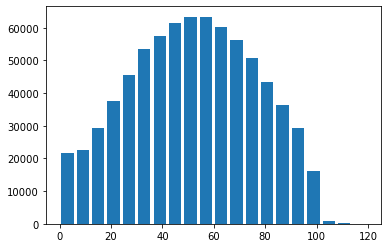

In [189]:
plt.hist(train_internet[train_internet['recircle_u']<120]['recircle_u'], 20, histtype='bar', rwidth=0.8)
plt.show()

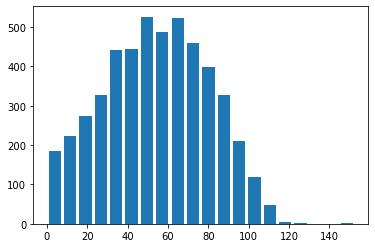

In [190]:
plt.hist(test_bank['recircle_u'], 20, histtype='bar', rwidth=0.8)
plt.show()

In [204]:
ru_bin = [-1, 20, 40, 55, 65, 80, 100, data_b['recircle_u'].max()]
ru_labels = [i for i in range(len(ru_bin)-1)]
data_b['ru_bin'] = pd.cut(data_b['recircle_u'], ru_bin, labels=ru_labels)
data_b.groupby(['ru_bin']).agg({'isDefault':'mean','ru_bin':'count'}).rename(columns={'isDefault':'mean','ru_bin':'count'}).reset_index()

ru_bin      mean  count
0      0  0.145004   1131
1      1  0.155221   2126
2      2  0.162148   1955
3      3  0.196602   1236
4      4  0.170056   1770
5      5  0.179155   1468
6      6  0.207006    314

In [205]:
data_t['ru_bin'] = pd.cut(data_t['recircle_u'], ru_bin, labels=ru_labels)
data_t.groupby(['ru_bin']).agg({'is_default':'mean','ru_bin':'count'}).rename(columns={'is_default':'mean','ru_bin':'count'}).reset_index()

ru_bin      mean   count
0      0  0.149796   86284
1      1  0.180072  164084
2      2  0.201928  155481
3      3  0.213591  102757
4      4  0.219547  131917
5      5  0.226519  106446
6      6  0.263243    2473

In [207]:
data_e['ru_bin'] = pd.cut(data_e['recircle_u'], ru_bin, labels=ru_labels)
data_e.groupby(['ru_bin']).agg({'ru_bin':'count'}).rename(columns={'ru_bin':'count'}).reset_index()

ru_bin  count
0      0    555
1      1   1015
2      2    968
3      3    670
4      4    879
5      5    757
6      6    153

In [210]:
train_bank.groupby(['initial_list_status']).agg({'initial_list_status':'count','isDefault':'mean'}).rename(columns={'initial_list_status':'count','isDefault':'mean'}).reset_index()

initial_list_status  count      mean
0                    0   5859  0.165557
1                    1   4141  0.172181

In [212]:
train_internet.groupby(['initial_list_status']).agg({'initial_list_status':'count','is_default':'mean'}).rename(columns={'initial_list_status':'count','is_default':'mean'}).reset_index()

initial_list_status   count      mean
0                    0  437116  0.201978
1                    1  312884  0.196191

In [213]:
test_bank.groupby(['initial_list_status']).agg({'initial_list_status':'count'}).rename(columns={'initial_list_status':'count'}).reset_index()

initial_list_status  count
0                    0   2963
1                    1   2037

In [214]:
train_bank.groupby(['app_type']).agg({'app_type':'count','isDefault':'mean'}).rename(columns={'app_type':'count','isDefault':'mean'}).reset_index()

app_type  count      mean
0         0   9800  0.168061
1         1    200  0.180000

In [216]:
test_bank.groupby(['app_type']).agg({'app_type':'count'}).rename(columns={'app_type':'count'}).reset_index()

app_type  count
0         0   4917
1         1     83

In [5]:
len(set(list(train_bank['earlies_credit_mon'])))

528

In [12]:
data_b['earlies_credit_mon'].head(20)

0      1-Dec
1     Apr-90
2     Oct-91
3      1-Jun
4      2-May
5     Jan-83
6      2-Oct
7      8-Oct
8     Nov-71
9      1-Dec
10     4-Jul
11    Aug-91
12    May-91
13     3-Aug
14     2-Feb
15    Dec-89
16    Dec-95
17    Sep-95
18    Nov-89
19    Nov-94
Name: earlies_credit_mon, dtype: object

In [19]:
data_t['earlies_credit_mon'].head(60)

0     Mar-1984
1     Jan-1992
2     Oct-1996
3     Jul-2000
4     Mar-2000
5     May-2002
6     Aug-2000
7     Oct-2005
8     Apr-2001
9     Sep-1992
10    Feb-1986
11    Aug-2004
12    Jul-1996
13    Feb-2001
14    Oct-1993
15    Jan-1985
16    Oct-1992
17    Jan-1997
18    May-1998
19    Dec-1996
20    Jun-1995
21    Sep-2003
22    May-1992
23    May-2003
24    Oct-2000
25    Jan-1997
26    Oct-1991
27    Mar-2005
28    Apr-2006
29    Sep-2007
30    Aug-1996
31    Jul-2005
32    Aug-2004
33    Feb-2003
34    Dec-2007
35    Mar-1995
36    Jul-2010
37    Jun-1991
38    Jul-2004
39    Aug-2003
40    Nov-2006
41    Feb-1991
42    Jun-1999
43    Nov-1990
44    Apr-2005
45    Jan-2006
46    Apr-2004
47    Aug-2005
48    Sep-1995
49    Jan-1991
50    Feb-2003
51    May-2008
52    Dec-2003
53    Aug-1996
54    Aug-2006
55    Aug-2006
56    Feb-2004
57    Sep-2003
58    Jul-2007
59    Dec-2007
Name: earlies_credit_mon, dtype: object

In [14]:
data_e['earlies_credit_mon'].head(20)

0      3-Mar
1     Dec-99
2     Apr-99
3     Jul-00
4      7-May
5     10-Aug
6     Jan-97
7      4-Mar
8     Apr-97
9     Sep-94
10    Oct-98
11     8-Aug
12     1-Jun
13    Aug-91
14    Mar-00
15     5-Oct
16     7-Oct
17    Mar-00
18     4-Dec
19    Jun-98
Name: earlies_credit_mon, dtype: object

In [20]:
#bank数据有两种表示格式，internet数据只有一种格式
#查看csv文件后发现bank数据格式含义：日期-月份：2021年某月某日，月份-日期2000年及以前的某年某月

In [21]:
#train_bank的该字段没有2001-2020的数据

In [22]:
#数据非常奇怪，所以只提取月份吧

In [5]:
ecm_b = data_b['earlies_credit_mon'].str.split('-')

In [6]:
ecm_b

0        [1, Dec]
1       [Apr, 90]
2       [Oct, 91]
3        [1, Jun]
4        [2, May]
          ...    
9995     [6, Feb]
9996    [May, 97]
9997    [Feb, 87]
9998    [Oct, 92]
9999     [9, Feb]
Name: earlies_credit_mon, Length: 10000, dtype: object

In [7]:
for e in ecm_b:
	e=e.sort()

In [8]:
ecm_b

0        [1, Dec]
1       [90, Apr]
2       [91, Oct]
3        [1, Jun]
4        [2, May]
          ...    
9995     [6, Feb]
9996    [97, May]
9997    [87, Feb]
9998    [92, Oct]
9999     [9, Feb]
Name: earlies_credit_mon, Length: 10000, dtype: object

In [9]:
ecm_b.str[1]

0       Dec
1       Apr
2       Oct
3       Jun
4       May
       ... 
9995    Feb
9996    May
9997    Feb
9998    Oct
9999    Feb
Name: earlies_credit_mon, Length: 10000, dtype: object

In [10]:
data_b['e_c_mon'] = ecm_b.str[1]

In [11]:
ecm_t = data_t['earlies_credit_mon'].str.split('-')
for e in ecm_t:
	e=e.sort()
data_t['e_c_mon'] = ecm_t.str[1]

In [12]:
ecm_e = data_e['earlies_credit_mon'].str.split('-')

for e in ecm_e:
	e=e.sort()

data_e['e_c_mon'] = ecm_e.str[1]

In [13]:
data_b.groupby(['e_c_mon']).agg({'e_c_mon':'count','isDefault':'mean'}).rename(columns={'e_c_mon':'count','isDefault':'mean'}).reset_index()

e_c_mon  count      mean
0      Apr    720  0.163889
1      Aug   1014  0.172584
2      Dec    804  0.157960
3      Feb    712  0.154494
4      Jan    752  0.178191
5      Jul    830  0.156627
6      Jun    780  0.164103
7      Mar    839  0.174017
8      May    783  0.167305
9      Nov    884  0.158371
10     Oct    927  0.188781
11     Sep    955  0.176963

In [14]:
data_t.groupby(['e_c_mon']).agg({'e_c_mon':'count','is_default':'mean'}).rename(columns={'e_c_mon':'count','is_default':'mean'}).reset_index()

e_c_mon  count      mean
0      Apr  57310  0.201623
1      Aug  74206  0.196332
2      Dec  60468  0.199246
3      Feb  54510  0.200183
4      Jan  54949  0.199530
5      Jul  60318  0.198830
6      Jun  57966  0.201221
7      Mar  60947  0.199665
8      May  58498  0.203221
9      Nov  65952  0.201025
10     Oct  72029  0.199628
11     Sep  72847  0.195945

In [15]:
data_e.groupby(['e_c_mon']).agg({'e_c_mon':'count'}).rename(columns={'e_c_mon':'count'}).reset_index()

e_c_mon  count
0      Apr    379
1      Aug    523
2      Dec    404
3      Feb    376
4      Jan    327
5      Jul    418
6      Jun    371
7      Mar    396
8      May    398
9      Nov    436
10     Oct    481
11     Sep    491

In [16]:
ecmon_b = data_b.groupby(['e_c_mon']).agg({'e_c_mon':'count','isDefault':'mean'}).rename(columns={'e_c_mon':'count','isDefault':'mean'}).reset_index()
ecmon_t = data_t.groupby(['e_c_mon']).agg({'e_c_mon':'count','is_default':'mean'}).rename(columns={'e_c_mon':'count','is_default':'mean'}).reset_index()
ecmon_merge = pd.merge(ecmon_b,ecmon_t,on='e_c_mon')

In [54]:
ecmon_merge

e_c_mon  count_x    mean_x  count_y    mean_y
0      Apr      720  0.163889    57310  0.201623
1      Aug     1014  0.172584    74206  0.196332
2      Dec      804  0.157960    60468  0.199246
3      Feb      712  0.154494    54510  0.200183
4      Jan      752  0.178191    54949  0.199530
5      Jul      830  0.156627    60318  0.198830
6      Jun      780  0.164103    57966  0.201221
7      Mar      839  0.174017    60947  0.199665
8      May      783  0.167305    58498  0.203221
9      Nov      884  0.158371    65952  0.201025
10     Oct      927  0.188781    72029  0.199628
11     Sep      955  0.176963    72847  0.195945

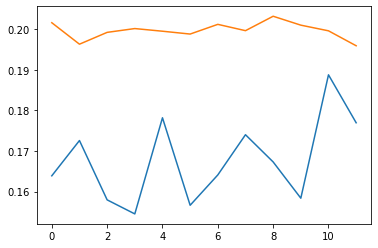

In [55]:
x=range(0,12)
y1=ecmon_merge.mean_x
y2=ecmon_merge.mean_y
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [56]:
ecmon_merge.mean_x.corr(ecmon_merge.mean_y,method='spearman')

-0.20979020979020982

In [57]:
#弱负相关。。。。

In [58]:
len(set(list(train_bank['title'])))

908

In [59]:
len(set(list(test_bank['title'])))

508

In [60]:
len(set(list(train_internet['title'])))

37499

In [62]:
len(set(list(train_bank['title'])+list(test_bank['title'])))

1288

In [67]:
title_b = train_bank.groupby(['title']).agg({'title':'count','isDefault':'mean'}).rename(columns={'title':'count','isDefault':'mean'}).sort_values(by='count',ascending=False).reset_index()

In [68]:
title_b.head(50)

title  count      mean
0       0   4924  0.183184
1       4   1836  0.159041
2       5    544  0.139706
3       6    520  0.155769
4       3    168  0.154762
5       2    120  0.200000
6      38    111  0.054054
7      10     97  0.237113
8       1     87  0.298851
9       9     74  0.189189
10      8     66  0.136364
11     11     63  0.142857
12      7     59  0.169492
13     28     37  0.108108
14     70     35  0.200000
15    193     34  0.029412
16     71     21  0.047619
17     94     18  0.000000
18     26     18  0.111111
19    106     17  0.000000
20     95     10  0.100000
21    234     10  0.000000
22    299     10  0.100000
23    268      9  0.000000
24    289      8  0.125000
25     76      8  0.125000
26     51      8  0.375000
27     56      7  0.571429
28    191      7  0.142857
29     39      7  0.142857
30    173      6  0.500000
31    664      6  0.333333
32    269      6  0.166667
33   1312      5  0.200000
34     12      5  0.000000
35    454      5  0.000000
36     63      5  0.400000
37     40      5  0.200000
38     78      5  0.000000
39    544      5  0.400000
40   1365      5  0.400000
41    175      5  0.200000
42     65      5  0.200000
43    259      5  0.000000
44    154      4  0.000000
45    514      4  0.000000
46    705      4  0.500000
47    360      4  0.250000
48    138      4  0.000000
49     74      4  0.000000

In [69]:
title_t = train_internet.groupby(['title']).agg({'title':'count','is_default':'mean'}).rename(columns={'title':'count','is_default':'mean'}).sort_values(by='count',ascending=False).reset_index()

In [70]:
title_t.head(50)

title   count      mean
0      0.0  368735  0.218032
1      4.0  138955  0.175337
2      5.0   41973  0.182617
3      6.0   37260  0.215754
4      3.0   13511  0.207313
5      2.0    9260  0.289093
6     38.0    8820  0.145125
7     10.0    7575  0.223894
8      1.0    6567  0.305771
9      9.0    6312  0.156527
10     8.0    4459  0.195111
11    11.0    4409  0.240417
12     7.0    3309  0.241463
13    28.0    2882  0.136364
14    70.0    2695  0.201484
15   193.0    2118  0.144004
16    26.0    1332  0.107357
17   106.0    1211  0.184145
18    71.0    1166  0.144940
19    94.0     979  0.133810
20   268.0     977  0.117707
21   234.0     819  0.089133
22    95.0     808  0.085396
23   299.0     665  0.163910
24    56.0     657  0.170472
25   148.0     571  0.150613
26    51.0     432  0.155093
27   454.0     421  0.130641
28    76.0     415  0.166265
29   191.0     405  0.180247
30    12.0     401  0.264339
31    63.0     400  0.215000
32   173.0     397  0.176322
33    41.0     378  0.174603
34   664.0     354  0.192090
35   104.0     353  0.124646
36   289.0     346  0.104046
37   206.0     338  0.195266
38   241.0     333  0.150150
39   413.0     328  0.109756
40   544.0     323  0.182663
41   259.0     316  0.161392
42    68.0     301  0.179402
43    65.0     284  0.176056
44   138.0     276  0.144928
45   269.0     268  0.123134
46  2091.0     259  0.332046
47   514.0     255  0.125490
48    40.0     251  0.175299
49   372.0     249  0.084337

In [72]:
title_e = test_bank.groupby(['title']).agg({'title':'count'}).rename(columns={'title':'count'}).sort_values(by='count',ascending=False).reset_index()

In [74]:
title_e.head(50)

title  count
0       0   2404
1       4    948
2       5    304
3       6    233
4       3    102
5       2     68
6      10     66
7      38     52
8       1     46
9      11     37
10      9     32
11      7     31
12      8     23
13     70     19
14     28     12
15    106     11
16    193     11
17     94     10
18     56      9
19    234      8
20    664      6
21    268      6
22     26      6
23     53      5
24     51      5
25    454      5
26     71      5
27    148      5
28    138      5
29    299      4
30     95      4
31    100      3
32    104      3
33    289      3
34    269      3
35     12      3
36     41      3
37     63      3
38    899      2
39   1850      2
40   3332      2
41    350      2
42    351      2
43    360      2
44    372      2
45   2091      2
46    499      2
47    906      2
48    580      2
49    624      2

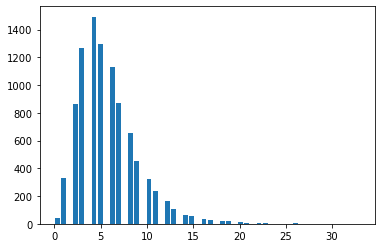

In [38]:
plt.hist(train_bank['f0'], 50, histtype='bar', rwidth=0.8)
plt.show()

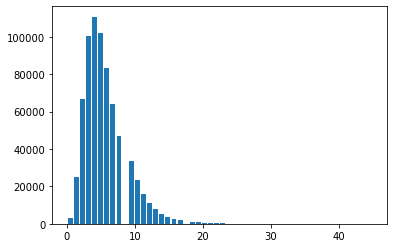

In [39]:
plt.hist(train_internet['f0'], 50, histtype='bar', rwidth=0.8)
plt.show()

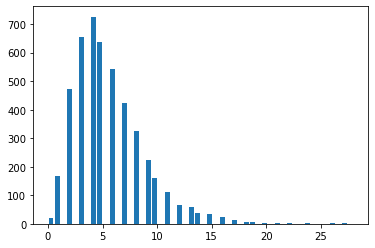

In [40]:
plt.hist(test_bank['f0'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [41]:
data_b.groupby(['f0']).agg({'isDefault':'mean','f0':'count'}).rename(columns={'isDefault':'mean','f0':'count'}).reset_index()

f0      mean  count
0   -1.0  0.122490    498
1    0.0  0.113636     44
2    1.0  0.159159    333
3    2.0  0.119075    865
4    3.0  0.154209   1271
5    4.0  0.157401   1493
6    5.0  0.170525   1296
7    6.0  0.155615   1131
8    7.0  0.174713    870
9    8.0  0.182515    652
10   9.0  0.203091    453
11  10.0  0.190031    321
12  11.0  0.242678    239
13  12.0  0.248447    161
14  13.0  0.281818    110
15  14.0  0.238806     67
16  15.0  0.339286     56
17  16.0  0.315789     38
18  17.0  0.320000     25
19  18.0  0.347826     23
20  19.0  0.210526     19
21  20.0  0.090909     11
22  21.0  0.285714      7
23  22.0  0.750000      4
24  23.0  0.666667      3
25  24.0  0.500000      2
26  25.0  0.500000      2
27  26.0  0.750000      4
28  28.0  0.000000      1
29  33.0  0.000000      1

In [42]:
data_t.groupby(['f0']).agg({'is_default':'mean','f0':'count'}).rename(columns={'is_default':'mean','f0':'count'}).reset_index()

f0      mean   count
0   -1.0  0.149294   37798
1    0.0  0.187767    3041
2    1.0  0.162350   24829
3    2.0  0.166634   66457
4    3.0  0.176716  100523
5    4.0  0.187676  110696
6    5.0  0.198501  102216
7    6.0  0.208579   83316
8    7.0  0.215208   64045
9    8.0  0.227385   47171
10   9.0  0.235868   33434
11  10.0  0.240270   23278
12  11.0  0.252742   16048
13  12.0  0.256911   11214
14  13.0  0.265727    7662
15  14.0  0.264031    5488
16  15.0  0.274304    3806
17  16.0  0.289572    2666
18  17.0  0.289239    1905
19  18.0  0.336947    1199
20  19.0  0.285714     987
21  20.0  0.298137     644
22  21.0  0.311060     434
23  22.0  0.318937     301
24  23.0  0.300000     230
25  24.0  0.268750     160
26  25.0  0.338710     124
27  26.0  0.363636      88
28  27.0  0.372881      59
29  28.0  0.250000      44
30  29.0  0.225000      40
31  30.0  0.478261      23
32  31.0  0.214286      14
33  32.0  0.230769      13
34  33.0  0.300000      10
35  34.0  0.200000      10
36  35.0  0.400000       5
37  36.0  0.400000       5
38  37.0  0.333333       3
39  38.0  0.000000       3
40  39.0  0.750000       4
41  42.0  0.000000       1
42  43.0  0.500000       4
43  44.0  1.000000       1
44  45.0  0.000000       1

In [43]:
data_e.groupby(['f0']).agg({'f0':'count'}).rename(columns={'f0':'count'}).reset_index()

f0  count
0   -1.0    259
1    0.0     21
2    1.0    169
3    2.0    474
4    3.0    655
5    4.0    726
6    5.0    638
7    6.0    542
8    7.0    424
9    8.0    327
10   9.0    222
11  10.0    162
12  11.0    111
13  12.0     67
14  13.0     59
15  14.0     38
16  15.0     36
17  16.0     23
18  17.0     15
19  18.0      7
20  19.0      7
21  20.0      3
22  21.0      4
23  22.0      3
24  23.0      1
25  24.0      2
26  26.0      2
27  27.0      2
28  28.0      1

In [14]:
#尾部违约率相对较高，数据量也相对较少，可以适当合并

In [15]:
set(list(train_bank['policy_code']))

{1}

In [16]:
set(list(train_internet['policy_code']))

{1.0}

In [17]:
set(list(test_bank['policy_code']))

{1}

In [44]:
data_b.groupby(['f1']).agg({'isDefault':'mean','f1':'count'}).rename(columns={'isDefault':'mean','f1':'count'}).reset_index()

f1      mean  count
0 -1.0  0.173660    858
1  0.0  0.167817   9129
2  1.0  0.153846     13

In [45]:
data_t.groupby(['f1']).agg({'is_default':'mean','f1':'count'}).rename(columns={'is_default':'mean','f1':'count'}).reset_index()

f1      mean   count
0 -1.0  0.201510   65411
1  0.0  0.199385  684067
2  1.0  0.193548     496
3  2.0  0.083333      24
4  3.0  1.000000       1
5  4.0  0.000000       1

In [46]:
data_e.groupby(['f1']).agg({'f1':'count'}).rename(columns={'f1':'count'}).reset_index()

f1  count
0 -1.0    454
1  0.0   4542
2  1.0      4

In [23]:
#考虑删除这个特征

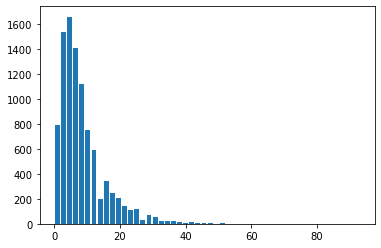

In [47]:
plt.hist(train_bank['f2'], 50, histtype='bar', rwidth=0.8)
plt.show()

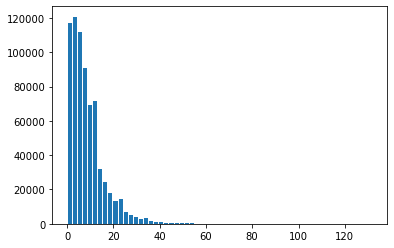

In [48]:
plt.hist(train_internet['f2'], 60, histtype='bar', rwidth=0.8)
plt.show()

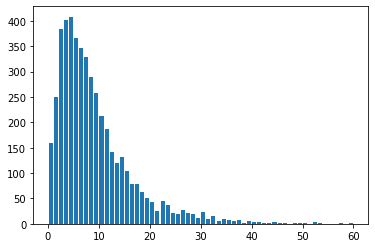

In [49]:
plt.hist(test_bank['f2'], 60, histtype='bar', rwidth=0.8)
plt.show()

In [50]:
data_b.groupby(['f2']).agg({'isDefault':'mean','f2':'count'}).rename(columns={'isDefault':'mean','f2':'count'}).reset_index()

f2      mean  count
0   -1.0  0.122490    498
1    0.0  0.158273    278
2    1.0  0.182879    514
3    2.0  0.182825    722
4    3.0  0.188957    815
5    4.0  0.166466    829
6    5.0  0.183353    829
7    6.0  0.181457    755
8    7.0  0.145260    654
9    8.0  0.168675    581
10   9.0  0.157009    535
11  10.0  0.135514    428
12  11.0  0.139319    323
13  12.0  0.154762    336
14  13.0  0.127490    251
15  14.0  0.189744    195
16  15.0  0.224044    183
17  16.0  0.182390    159
18  17.0  0.093220    118
19  18.0  0.176000    125
20  19.0  0.185185    108
21  20.0  0.141414     99
22  21.0  0.202532     79
23  22.0  0.109375     64
24  23.0  0.188679     53
25  24.0  0.175439     57
26  25.0  0.235294     68
27  26.0  0.240741     54
28  27.0  0.354839     31
29  28.0  0.210526     38
30  29.0  0.290323     31
31  30.0  0.137931     29
32  31.0  0.192308     26
33  32.0  0.230769     13
34  33.0  0.307692     13
35  34.0  0.187500     16
36  35.0  0.000000      7
37  36.0  0.285714     14
38  37.0  0.000000      7
39  38.0  0.083333     12
40  39.0  0.000000      4
41  40.0  0.333333      6
42  41.0  0.200000      5
43  42.0  0.250000      8
44  43.0  0.000000      4
45  44.0  0.000000      3
46  45.0  0.500000      2
47  46.0  0.000000      4
48  47.0  0.000000      2
49  48.0  0.000000      3
50  50.0  0.000000      1
51  51.0  0.000000      2
52  52.0  0.000000      1
53  56.0  0.000000      2
54  59.0  0.000000      1
55  60.0  1.000000      1
56  64.0  1.000000      1
57  70.0  0.000000      1
58  89.0  0.000000      1
59  93.0  1.000000      1

In [51]:
data_t.groupby(['f2']).agg({'is_default':'mean','f2':'count'}).rename(columns={'is_default':'mean','f2':'count'}).reset_index().head(60)

f2      mean  count
0   -1.0  0.149294  37798
1    0.0  0.217727  21233
2    1.0  0.207956  41379
3    2.0  0.202195  54403
4    3.0  0.200203  60179
5    4.0  0.201757  60548
6    5.0  0.198968  57924
7    6.0  0.201466  53602
8    7.0  0.198386  48078
9    8.0  0.203402  42974
10   9.0  0.195353  36969
11  10.0  0.198868  32142
12  11.0  0.202570  27546
13  12.0  0.200722  23555
14  13.0  0.199941  20426
15  14.0  0.197090  17317
16  15.0  0.200095  14788
17  16.0  0.194022  12947
18  17.0  0.198556  11216
19  18.0  0.198331   9585
20  19.0  0.208268   8273
21  20.0  0.204866   7234
22  21.0  0.208429   6098
23  22.0  0.200000   5495
24  23.0  0.201606   4732
25  24.0  0.204970   4225
26  25.0  0.215946   3700
27  26.0  0.229186   3255
28  27.0  0.210772   2785
29  28.0  0.214169   2442
30  29.0  0.216721   2141
31  30.0  0.217345   1868
32  31.0  0.216796   1679
33  32.0  0.220085   1404
34  33.0  0.236189   1249
35  34.0  0.201281   1093
36  35.0  0.239741    926
37  36.0  0.214286    798
38  37.0  0.235686    751
39  38.0  0.253682    611
40  39.0  0.229050    537
41  40.0  0.221116    502
42  41.0  0.213115    427
43  42.0  0.227666    347
44  43.0  0.227405    343
45  44.0  0.233216    283
46  45.0  0.210117    257
47  46.0  0.234742    213
48  47.0  0.224599    187
49  48.0  0.258242    182
50  49.0  0.218391    174
51  50.0  0.260000    150
52  51.0  0.194915    118
53  52.0  0.258065     93
54  53.0  0.153846     91
55  54.0  0.322222     90
56  55.0  0.277108     83
57  56.0  0.245614     57
58  57.0  0.225000     40
59  58.0  0.105263     57

In [52]:
data_e.groupby(['f2']).agg({'f2':'count'}).rename(columns={'f2':'count'}).reset_index()

f2  count
0   -1.0    259
1    0.0    159
2    1.0    250
3    2.0    384
4    3.0    402
5    4.0    408
6    5.0    367
7    6.0    347
8    7.0    329
9    8.0    289
10   9.0    257
11  10.0    212
12  11.0    186
13  12.0    141
14  13.0    119
15  14.0    131
16  15.0    104
17  16.0     79
18  17.0     79
19  18.0     63
20  19.0     50
21  20.0     42
22  21.0     26
23  22.0     44
24  23.0     37
25  24.0     21
26  25.0     19
27  26.0     27
28  27.0     21
29  28.0     20
30  29.0     11
31  30.0     24
32  31.0     10
33  32.0     16
34  33.0      6
35  34.0      9
36  35.0      8
37  36.0      5
38  37.0      7
39  38.0      1
40  39.0      5
41  40.0      3
42  41.0      4
43  42.0      1
44  43.0      2
45  44.0      3
46  45.0      2
47  46.0      1
48  48.0      1
49  49.0      2
50  50.0      1
51  52.0      3
52  53.0      1
53  57.0      1
54  60.0      1

In [35]:
#bank和internet数据的分组违约率有时候差异较大，这种情况一方面可能是bank数据量较少导致的，另一方面可能是两个数据确实有所差异。
#具体哪种原因还是得看测试集的情况。另外也可能会随时间的变化出现漂移。

In [79]:
f2_bin = [-2, -1, 5, 10, 15, 20, 30, data_b['f2'].max()]
f2_labels = [i for i in range(len(f2_bin)-1)]
data_b['f2_bin'] = pd.cut(data_b['f2'], f2_bin, labels=f2_labels)
data_b.groupby(['f2_bin']).agg({'isDefault':'mean','f2_bin':'count'}).rename(columns={'isDefault':'mean','f2_bin':'count'}).reset_index()

f2_bin      mean  count
0      0  0.122490    498
1      1  0.179082   3987
2      2  0.159837   2953
3      3  0.160714   1288
4      4  0.157635    609
5      5  0.206349    504
6      6  0.180124    161

In [80]:
data_t['f2_bin'] = pd.cut(data_t['f2'], f2_bin, labels=f2_labels)
data_t.groupby(['f2_bin']).agg({'is_default':'mean','f2_bin':'count'}).rename(columns={'is_default':'mean','f2_bin':'count'}).reset_index()

f2_bin      mean   count
0      0  0.149294   37798
1      1  0.202989  295666
2      2  0.199715  213765
3      3  0.200363  103632
4      4  0.199878   49255
5      5  0.209983   36741
6      6  0.227868   13126

In [81]:
data_e['f2_bin'] = pd.cut(data_e['f2'], f2_bin, labels=f2_labels)
data_e.groupby(['f2_bin']).agg({'f2_bin':'count'}).rename(columns={'f2_bin':'count'}).reset_index()

f2_bin  count
0      0    259
1      1   1970
2      2   1434
3      3    681
4      4    313
5      5    250
6      6     93

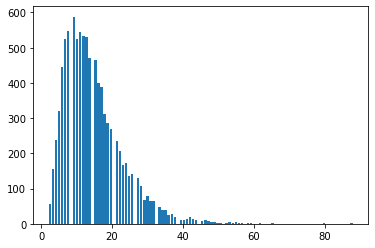

In [69]:
plt.hist(train_bank['f3'], 100, histtype='bar', rwidth=0.8)
plt.show()

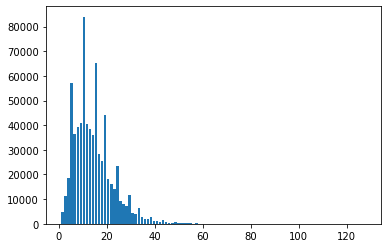

In [70]:
plt.hist(train_internet['f3'], 100, histtype='bar', rwidth=0.8)
plt.show()

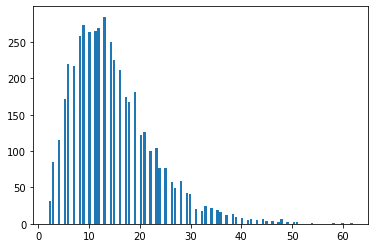

In [71]:
plt.hist(test_bank['f3'], 100, histtype='bar', rwidth=0.8)
plt.show()

In [76]:
data_b.groupby(['f3']).agg({'isDefault':'mean','f3':'count'}).rename(columns={'isDefault':'mean','f3':'count'}).reset_index().head(60)

f3      mean  count
0   -1.0  0.122490    498
1    2.0  0.250000     56
2    3.0  0.197452    157
3    4.0  0.210084    238
4    5.0  0.140625    320
5    6.0  0.171171    444
6    7.0  0.154580    524
7    8.0  0.166362    547
8    9.0  0.183673    588
9   10.0  0.161905    525
10  11.0  0.166667    546
11  12.0  0.185741    533
12  13.0  0.152830    530
13  14.0  0.155319    470
14  15.0  0.152688    465
15  16.0  0.160000    400
16  17.0  0.146907    388
17  18.0  0.176849    311
18  19.0  0.143860    285
19  20.0  0.160448    268
20  21.0  0.161702    235
21  22.0  0.213592    206
22  23.0  0.142857    168
23  24.0  0.212644    174
24  25.0  0.229630    135
25  26.0  0.141844    141
26  27.0  0.184615    130
27  28.0  0.254717    106
28  29.0  0.235294     68
29  30.0  0.102564     78
30  31.0  0.140625     64
31  32.0  0.138462     65
32  33.0  0.170213     47
33  34.0  0.250000     40
34  35.0  0.236842     38
35  36.0  0.200000     25
36  37.0  0.178571     28
37  38.0  0.157895     19
38  39.0  0.181818     11
39  40.0  0.250000     12
40  41.0  0.357143     14
41  42.0  0.333333     18
42  43.0  0.266667     15
43  44.0  0.454545     11
44  45.0  0.142857      7
45  46.0  0.200000     10
46  47.0  0.428571      7
47  48.0  0.000000      4
48  49.0  0.333333      6
49  50.0  0.000000      3
50  51.0  0.000000      1
51  52.0  0.000000      1
52  53.0  0.250000      4
53  54.0  0.500000      2
54  55.0  0.200000      5
55  56.0  0.000000      1
56  57.0  0.500000      2
57  58.0  0.000000      1
58  59.0  0.000000      1
59  62.0  1.000000      1

In [77]:
data_t.groupby(['f3']).agg({'is_default':'mean','f3':'count'}).rename(columns={'is_default':'mean','f3':'count'}).reset_index().head(60)

f3      mean  count
0   -1.0  0.149290  37799
1    1.0  0.100000     10
2    2.0  0.232776   4906
3    3.0  0.215095  11302
4    4.0  0.212751  18712
5    5.0  0.207893  25566
6    6.0  0.204291  31739
7    7.0  0.204492  36422
8    8.0  0.209981  39394
9    9.0  0.202210  41086
10  10.0  0.202776  41938
11  11.0  0.201170  42069
12  12.0  0.198490  40657
13  13.0  0.200836  38534
14  14.0  0.200077  36136
15  15.0  0.200951  33849
16  16.0  0.202023  31234
17  17.0  0.198676  28393
18  18.0  0.198028  25456
19  19.0  0.198448  23195
20  20.0  0.198409  20745
21  21.0  0.200797  18073
22  22.0  0.200037  16052
23  23.0  0.196588  14070
24  24.0  0.193186  12563
25  25.0  0.199982  11066
26  26.0  0.210040   9203
27  27.0  0.194318   8131
28  28.0  0.201663   7215
29  29.0  0.201316   6229
30  30.0  0.194226   5334
31  31.0  0.201396   4583
32  32.0  0.187076   3977
33  33.0  0.200804   3481
34  34.0  0.207317   2952
35  35.0  0.197502   2562
36  36.0  0.205345   2133
37  37.0  0.213184   1881
38  38.0  0.192188   1613
39  39.0  0.209581   1336
40  40.0  0.193969   1227
41  41.0  0.215686   1071
42  42.0  0.188811    858
43  43.0  0.193416    729
44  44.0  0.202435    657
45  45.0  0.220890    584
46  46.0  0.221505    465
47  47.0  0.196517    402
48  48.0  0.216216    370
49  49.0  0.212996    277
50  50.0  0.193133    233
51  51.0  0.170984    193
52  52.0  0.235955    178
53  53.0  0.190476    147
54  54.0  0.195312    128
55  55.0  0.174242    132
56  56.0  0.221053     95
57  57.0  0.160920     87
58  58.0  0.289855     69
59  59.0  0.196429     56

In [78]:
data_e.groupby(['f3']).agg({'f3':'count'}).rename(columns={'f3':'count'}).reset_index().head(60)

f3  count
0   -1.0    259
1    2.0     31
2    3.0     85
3    4.0    116
4    5.0    172
5    6.0    220
6    7.0    217
7    8.0    258
8    9.0    274
9   10.0    264
10  11.0    266
11  12.0    270
12  13.0    285
13  14.0    250
14  15.0    225
15  16.0    211
16  17.0    175
17  18.0    167
18  19.0    182
19  20.0    122
20  21.0    127
21  22.0    100
22  23.0    105
23  24.0     77
24  25.0     77
25  26.0     58
26  27.0     49
27  28.0     59
28  29.0     43
29  30.0     41
30  31.0     21
31  32.0     18
32  33.0     25
33  34.0     22
34  35.0     19
35  36.0     16
36  37.0     12
37  38.0     14
38  39.0      9
39  40.0      8
40  41.0      5
41  42.0      6
42  43.0      5
43  44.0      7
44  45.0      4
45  46.0      4
46  47.0      3
47  48.0      6
48  49.0      3
49  50.0      2
50  51.0      2
51  54.0      1
52  58.0      1
53  60.0      1
54  62.0      1

In [82]:
f3_bin = [-2, -1, 5, 10, 15, 20, 25, 30, 40, data_b['f3'].max()]
f3_labels = [i for i in range(len(f3_bin)-1)]
data_b['f3_bin'] = pd.cut(data_b['f3'], f3_bin, labels=f3_labels)
data_b.groupby(['f3_bin']).agg({'isDefault':'mean','f3_bin':'count'}).rename(columns={'isDefault':'mean','f3_bin':'count'}).reset_index()

f3_bin      mean  count
0      0  0.122490    498
1      1  0.181582    771
2      2  0.167808   2628
3      3  0.163129   2544
4      4  0.157385   1652
5      5  0.189542    918
6      6  0.181644    523
7      7  0.180516    349
8      8  0.290598    117

In [83]:
data_t['f3_bin'] = pd.cut(data_t['f3'], f3_bin, labels=f3_labels)
data_t.groupby(['f3_bin']).agg({'is_default':'mean','f3_bin':'count'}).rename(columns={'is_default':'mean','f3_bin':'count'}).reset_index()

f3_bin      mean   count
0      0  0.149290   37799
1      1  0.212741   60496
2      2  0.204724  190579
3      3  0.200288  191245
4      4  0.199275  129023
5      5  0.198346   71824
6      6  0.200986   36112
7      7  0.200078   25745
8      8  0.205229    7153

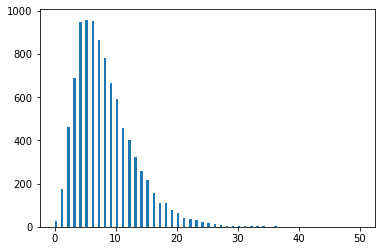

In [84]:
plt.hist(train_bank['f4'], 100, histtype='bar', rwidth=0.8)
plt.show()

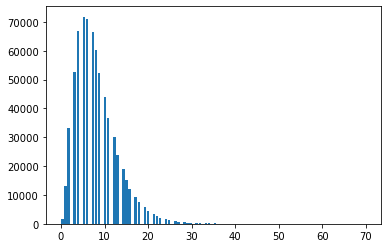

In [85]:
plt.hist(train_internet['f4'], 100, histtype='bar', rwidth=0.8)
plt.show()

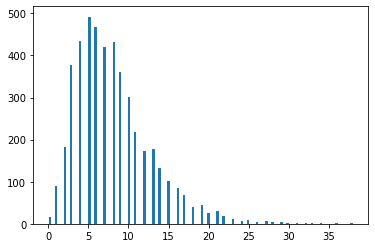

In [86]:
plt.hist(test_bank['f4'], 100, histtype='bar', rwidth=0.8)
plt.show()

In [88]:
f4_bin = [-2, -1, 4, 8, 14, 20, data_b['f4'].max()]
f4_labels = [i for i in range(len(f4_bin)-1)]
data_b['f4_bin'] = pd.cut(data_b['f4'], f4_bin, labels=f4_labels)
data_b.groupby(['f4_bin']).agg({'isDefault':'mean','f4_bin':'count'}).rename(columns={'isDefault':'mean','f4_bin':'count'}).reset_index()

f4_bin      mean  count
0      0  0.122490    498
1      1  0.189130   2300
2      2  0.155987   3558
3      3  0.166605   2695
4      4  0.183784    740
5      5  0.224880    209

In [89]:
data_t['f4_bin'] = pd.cut(data_t['f4'], f4_bin, labels=f4_labels)
data_t.groupby(['f4_bin']).agg({'is_default':'mean','f4_bin':'count'}).rename(columns={'is_default':'mean','f4_bin':'count'}).reset_index()

f4_bin      mean   count
0      0  0.149294   37798
1      1  0.215337  166985
2      2  0.202047  269576
3      3  0.195795  206200
4      4  0.189344   54335
5      5  0.195145   15076

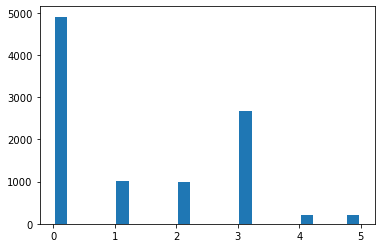

In [90]:
plt.hist(train_bank['early_return'], 20, histtype='bar', rwidth=0.8)
plt.show()

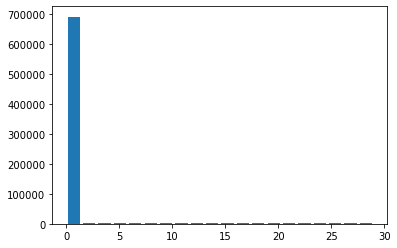

In [91]:
plt.hist(train_internet['early_return'], 20, histtype='bar', rwidth=0.8)
plt.show()

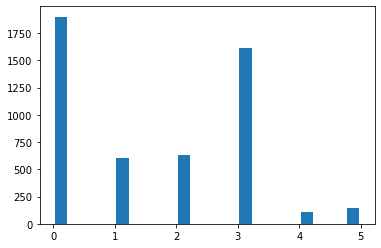

In [92]:
plt.hist(test_bank['early_return'], 20, histtype='bar', rwidth=0.8)
plt.show()

In [93]:
#bank和internet的数据分布差别很大

In [94]:
data_b.groupby(['early_return']).agg({'isDefault':'mean','early_return':'count'}).rename(columns={'isDefault':'mean','early_return':'count'}).reset_index()

early_return      mean  count
0             0  0.319609   4906
1             1  0.021934   1003
2             2  0.023952   1002
3             3  0.024710   2671
4             4  0.014706    204
5             5  0.000000    214

In [95]:
data_t.groupby(['early_return']).agg({'is_default':'mean','early_return':'count'}).rename(columns={'is_default':'mean','early_return':'count'}).reset_index()

early_return      mean   count
0              0  0.216894  690074
1              1  0.000000    2049
2              2  0.000000    2164
3              3  0.000000    2106
4              4  0.000000    2001
5              5  0.000000    2085
6              6  0.000000    2050
7              7  0.000000    2045
8              8  0.000000    2090
9              9  0.000000    2038
10            10  0.000000    2061
11            11  0.000000    2007
12            12  0.000000    1989
13            13  0.000000    2140
14            14  0.000000    2144
15            15  0.000000    2019
16            16  0.000000    2063
17            17  0.000000    2027
18            18  0.000000    2065
19            19  0.000000    2108
20            20  0.000000    2103
21            21  0.000000    2022
22            22  0.000000    2128
23            23  0.000000    2038
24            24  0.000000    2082
25            25  0.000000    2075
26            26  0.000000    2096
27            27  0.000000    2069
28            28  0.000000    2019
29            29  0.000000    2043

In [96]:
data_e.groupby(['early_return']).agg({'early_return':'count'}).rename(columns={'early_return':'count'}).reset_index()

early_return  count
0             0   1900
1             1    605
2             2    634
3             3   1611
4             4    106
5             5    144

In [97]:
#有提前还款的违约率很低，提前还款次数为0 的违约率较高

In [99]:
er_bin = [-1, 0, data_b['early_return'].max()]
er_labels = [i for i in range(len(er_bin)-1)]
data_b['er_bin'] = pd.cut(data_b['early_return'], er_bin, labels=er_labels)
data_b.groupby(['er_bin']).agg({'isDefault':'mean','er_bin':'count'}).rename(columns={'isDefault':'mean','er_bin':'count'}).reset_index()

er_bin      mean  count
0      0  0.319609   4906
1      1  0.022576   5094

In [100]:
data_t['er_bin'] = pd.cut(data_t['early_return'], er_bin, labels=er_labels)
data_t.groupby(['er_bin']).agg({'is_default':'mean','er_bin':'count'}).rename(columns={'is_default':'mean','er_bin':'count'}).reset_index()

er_bin      mean   count
0      0  0.216894  690074
1      1  0.000000   10405

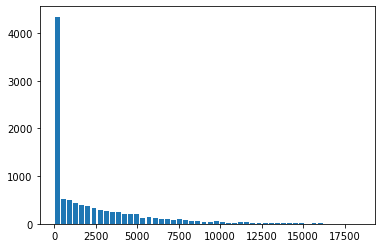

In [102]:
plt.hist(train_bank['early_return_amount'], 50, histtype='bar', rwidth=0.8)
plt.show()

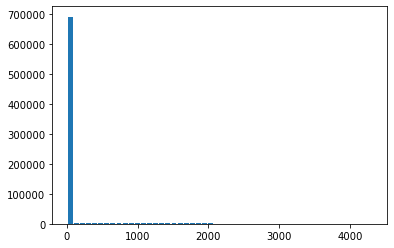

In [103]:
plt.hist(train_internet['early_return_amount'], 50, histtype='bar', rwidth=0.8)
plt.show()

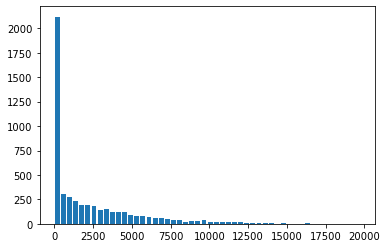

In [104]:
plt.hist(test_bank['early_return_amount'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [105]:
era_bin = [-1, 0, 2500, 5000, 10000, data_b['early_return_amount'].max()]
era_labels = [i for i in range(len(era_bin)-1)]
data_b['era_bin'] = pd.cut(data_b['early_return_amount'], era_bin, labels=era_labels)
data_b.groupby(['era_bin']).agg({'isDefault':'mean','era_bin':'count'}).rename(columns={'isDefault':'mean','era_bin':'count'}).reset_index()

era_bin      mean  count
0       0  0.401707   3866
1       1  0.026617   2968
2       2  0.018630   1664
3       3  0.015254   1180
4       4  0.006211    322

In [106]:
data_t['era_bin'] = pd.cut(data_t['early_return_amount'], era_bin, labels=era_labels)
data_t.groupby(['era_bin']).agg({'is_default':'mean','era_bin':'count'}).rename(columns={'is_default':'mean','era_bin':'count'}).reset_index()

era_bin      mean   count
0       0  0.216894  690074
1       1  0.000000   52714
2       2  0.000000    7212
3       3       NaN       0
4       4       NaN       0

In [107]:
data_e['era_bin'] = pd.cut(data_e['early_return_amount'], era_bin, labels=era_labels)
data_e.groupby(['era_bin']).agg({'era_bin':'count'}).rename(columns={'era_bin':'count'}).reset_index()

era_bin  count
0       0   1861
1       1   1523
2       2    854
3       3    609
4       4    150

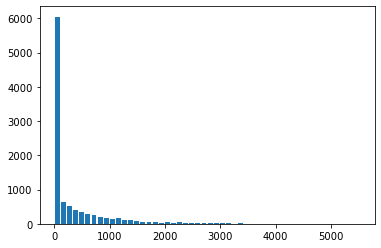

In [108]:
plt.hist(train_bank['early_return_amount_3mon'], 50, histtype='bar', rwidth=0.8)
plt.show()

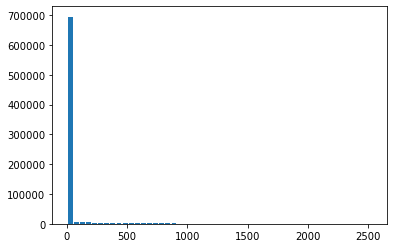

In [109]:
plt.hist(train_internet['early_return_amount_3mon'], 50, histtype='bar', rwidth=0.8)
plt.show()

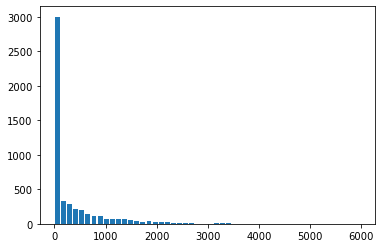

In [110]:
plt.hist(test_bank['early_return_amount_3mon'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [112]:
era3_bin = [-1, 0, 500, 1000, 2000, data_b['early_return_amount_3mon'].max()]
era3_labels = [i for i in range(len(era3_bin)-1)]
data_b['era3_bin'] = pd.cut(data_b['early_return_amount_3mon'], era3_bin, labels=era3_labels)
data_b.groupby(['era3_bin']).agg({'isDefault':'mean','era3_bin':'count'}).rename(columns={'isDefault':'mean','era3_bin':'count'}).reset_index()

era3_bin      mean  count
0        0  0.295421   5372
1        1  0.024340   2424
2        2  0.022202   1081
3        3  0.015584    770
4        4  0.002833    353

In [113]:
data_t['era3_bin'] = pd.cut(data_t['early_return_amount_3mon'], era3_bin, labels=era3_labels)
data_t.groupby(['era3_bin']).agg({'is_default':'mean','era3_bin':'count'}).rename(columns={'is_default':'mean','era3_bin':'count'}).reset_index()

era3_bin      mean   count
0        0  0.216894  690074
1        1  0.000000   37559
2        2  0.000000   15102
3        3  0.000000    6993
4        4  0.000000     272

In [114]:
data_e['era3_bin'] = pd.cut(data_e['early_return_amount_3mon'], era3_bin, labels=era3_labels)
data_e.groupby(['era3_bin']).agg({'era3_bin':'count'}).rename(columns={'era3_bin':'count'}).reset_index()

era3_bin  count
0        0   2623
1        1   1257
2        2    534
3        3    430
4        4    154

In [117]:
#构建新特征
data_b['recircle_ratio'] = data_b['recircle_b']/data_b['total_loan']
data_t['recircle_ratio'] = data_t['recircle_b']/data_t['total_loan']
data_e['recircle_ratio'] = data_e['recircle_b']/data_e['total_loan']
data_b['recircle_loan'] = data_b['recircle_u']*data_b['total_loan']
data_t['recircle_loan'] = data_t['recircle_u']*data_t['total_loan']
data_e['recircle_loan'] = data_e['recircle_u']*data_e['total_loan']

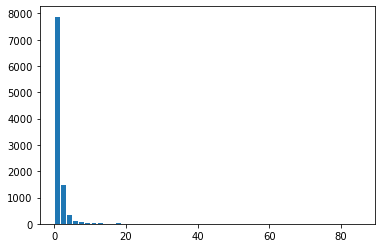

In [118]:
plt.hist(data_b['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

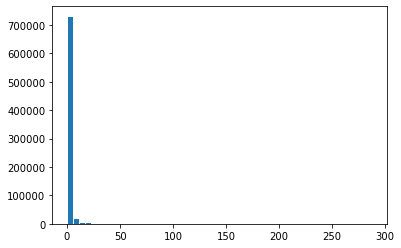

In [119]:
plt.hist(data_t['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

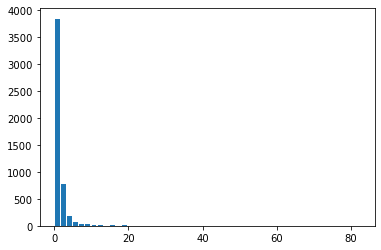

In [120]:
plt.hist(data_e['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

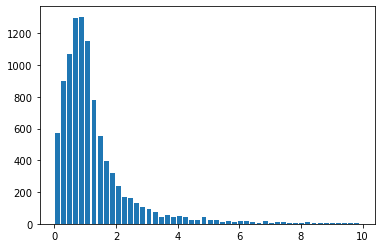

In [126]:
plt.hist(data_b[data_b['recircle_ratio']<10]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

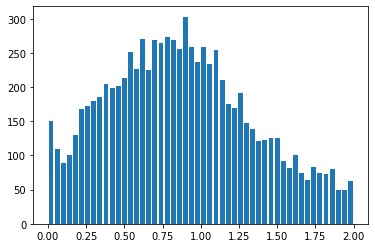

In [127]:
plt.hist(data_b[data_b['recircle_ratio']<2]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

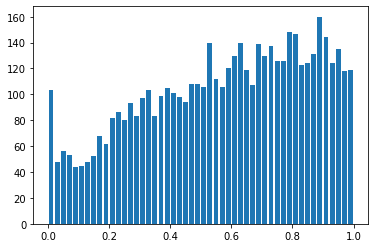

In [128]:
plt.hist(data_b[data_b['recircle_ratio']<1]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

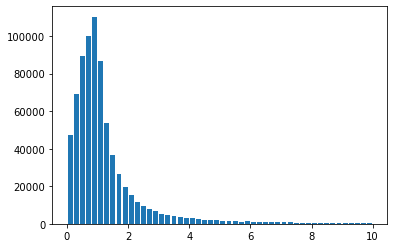

In [129]:
plt.hist(data_t[data_t['recircle_ratio']<10]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

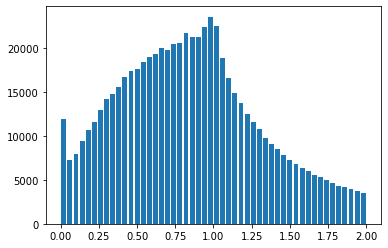

In [130]:
plt.hist(data_t[data_t['recircle_ratio']<2]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

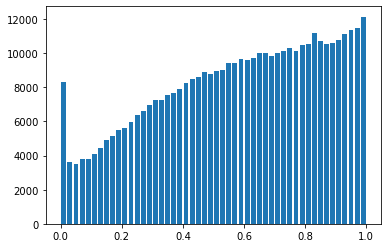

In [131]:
plt.hist(data_t[data_t['recircle_ratio']<1]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

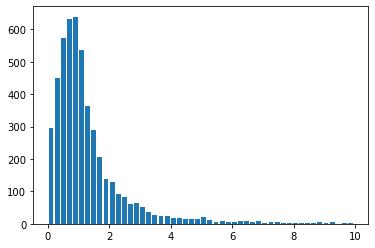

In [132]:
plt.hist(data_e[data_e['recircle_ratio']<10]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

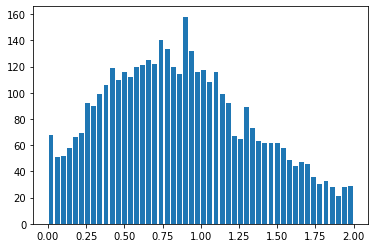

In [133]:
plt.hist(data_e[data_e['recircle_ratio']<2]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

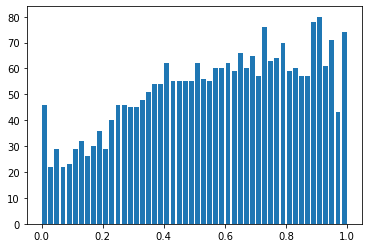

In [134]:
plt.hist(data_e[data_e['recircle_ratio']<1]['recircle_ratio'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [139]:
rr_bin = [-1, 0, 0.5, 0.75, 1, 1.25, 1.75, 2.5, 3.5, data_b['recircle_ratio'].max()]
rr_labels = [i for i in range(len(rr_bin)-1)]
data_b['rr_bin'] = pd.cut(data_b['recircle_ratio'], rr_bin, labels=rr_labels)
data_b.groupby(['rr_bin']).agg({'isDefault':'mean','rr_bin':'count'}).rename(columns={'isDefault':'mean','rr_bin':'count'}).reset_index()

rr_bin      mean  count
0      0  0.092593     54
1      1  0.196401   1945
2      2  0.183647   1541
3      3  0.171856   1670
4      4  0.151982   1362
5      5  0.144404   1385
6      6  0.153931    903
7      7  0.173116    491
8      8  0.146379    649

In [140]:
data_t['rr_bin'] = pd.cut(data_t['recircle_ratio'], rr_bin, labels=rr_labels)
data_t.groupby(['rr_bin']).agg({'is_default':'mean','rr_bin':'count'}).rename(columns={'is_default':'mean','rr_bin':'count'}).reset_index()

rr_bin      mean   count
0      0  0.183602    3720
1      1  0.241319  155678
2      2  0.217916  120886
3      3  0.190571  136238
4      4  0.177754  102293
5      5  0.187763   96020
6      6  0.184583   57302
7      7  0.171829   31217
8      8  0.149345   46617

In [141]:
data_e['rr_bin'] = pd.cut(data_e['recircle_ratio'], rr_bin, labels=rr_labels)
data_e.groupby(['rr_bin']).agg({'rr_bin':'count'}).rename(columns={'rr_bin':'count'}).reset_index()

rr_bin  count
0      0     22
1      1   1013
2      2    769
3      3    806
4      4    621
5      5    724
6      6    435
7      7    269
8      8    341

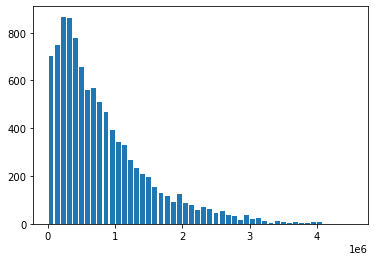

In [142]:
plt.hist(data_b['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

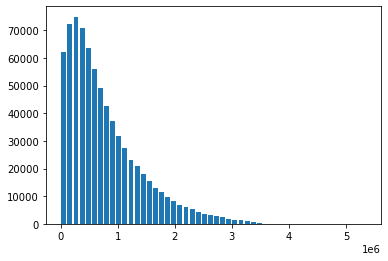

In [143]:
plt.hist(data_t['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

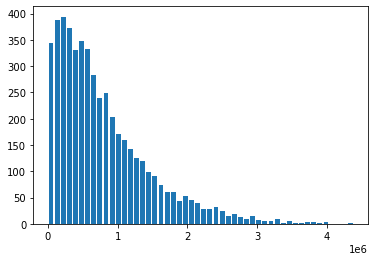

In [144]:
plt.hist(data_e['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

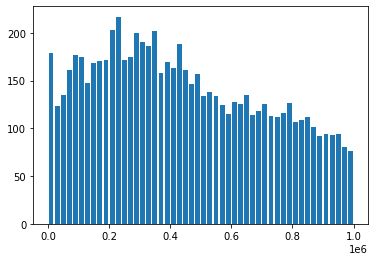

In [145]:
plt.hist(data_b[data_b['recircle_loan']<1000000]['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

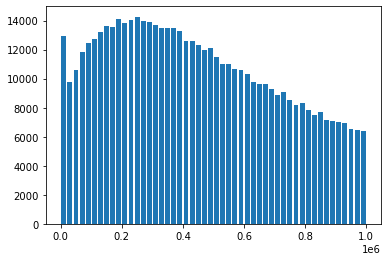

In [146]:
plt.hist(data_t[data_t['recircle_loan']<1000000]['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

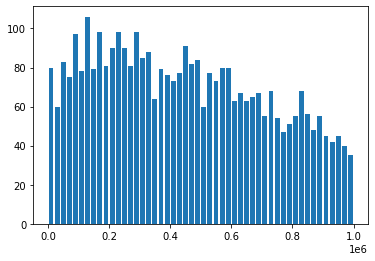

In [147]:
plt.hist(data_e[data_e['recircle_loan']<1000000]['recircle_loan'], 50, histtype='bar', rwidth=0.8)
plt.show()

In [154]:
rl_bin = [-1, 200000, 400000, 650000, 1000000, 1500000, 2500000, data_b['recircle_loan'].max()]
rl_labels = [i for i in range(len(rl_bin)-1)]
data_b['rl_bin'] = pd.cut(data_b['recircle_loan'], rl_bin, labels=rl_labels)
data_b.groupby(['rl_bin']).agg({'isDefault':'mean','rl_bin':'count'}).rename(columns={'isDefault':'mean','rl_bin':'count'}).reset_index()

rl_bin      mean  count
0      0  0.140373   1610
1      1  0.151628   1873
2      2  0.193367   1779
3      3  0.166487   1856
4      4  0.183908   1479
5      5  0.169863   1095
6      6  0.201299    308

In [155]:
data_t['rl_bin'] = pd.cut(data_t['recircle_loan'], rl_bin, labels=rl_labels)
data_t.groupby(['rl_bin']).agg({'is_default':'mean','rl_bin':'count'}).rename(columns={'is_default':'mean','rl_bin':'count'}).reset_index()

rl_bin      mean   count
0      0  0.144720  125131
1      1  0.175386  137468
2      2  0.195890  141207
3      3  0.216866  137149
4      4  0.232519  109862
5      5  0.245615   81705
6      6  0.253791   17475

In [156]:
data_e['rl_bin'] = pd.cut(data_e['recircle_loan'], rl_bin, labels=rl_labels)
data_e.groupby(['rl_bin']).agg({'rl_bin':'count'}).rename(columns={'rl_bin':'count'}).reset_index()

rl_bin  count
0      0    837
1      1    849
2      2    929
3      3    937
4      4    758
5      5    565
6      6    125